<a href="https://colab.research.google.com/github/sethkipsangmutuba/Summer-School-Mathematics-of-Artificial-Intellingence/blob/Deep-Learning/a6%20Graph_Theory_and_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

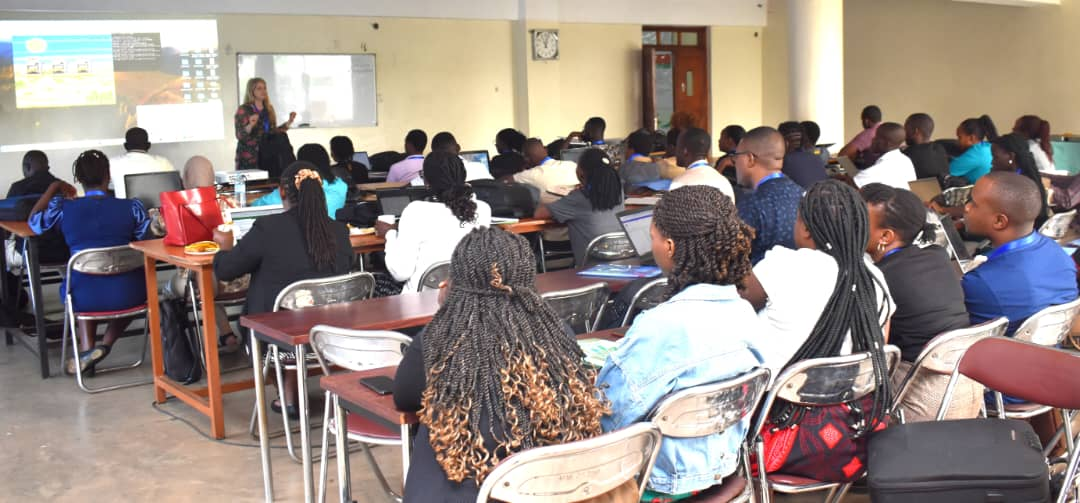

# GRAPH THEORY AND MACHINE LEARNING

# Structure of a Graph/Network

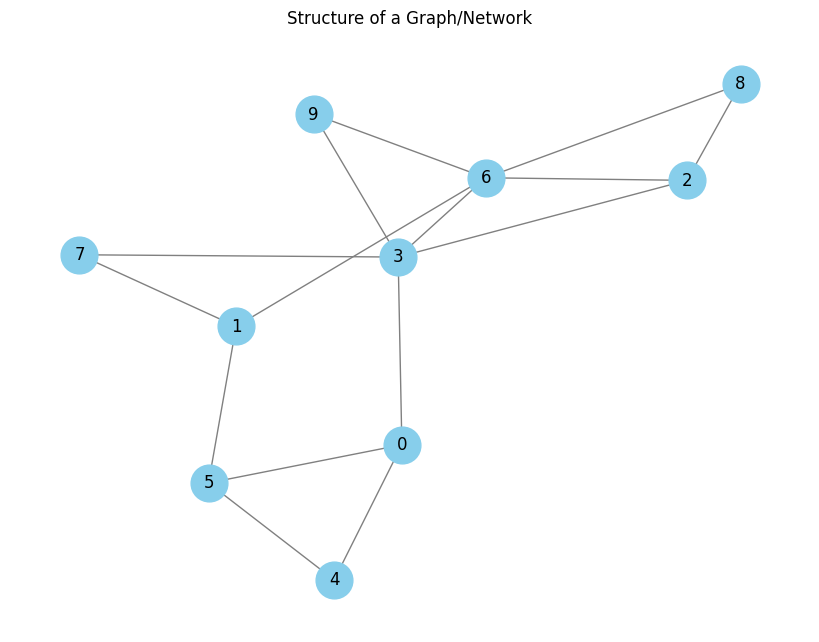

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.erdos_renyi_graph(n=10, p=0.3)

# Plot the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.title("Structure of a Graph/Network")
plt.show()

# 2. Tightly-Linked Regions (Communities)

Community 1: [0, 4, 5]
Community 2: [1, 2, 3, 6, 7, 8, 9]


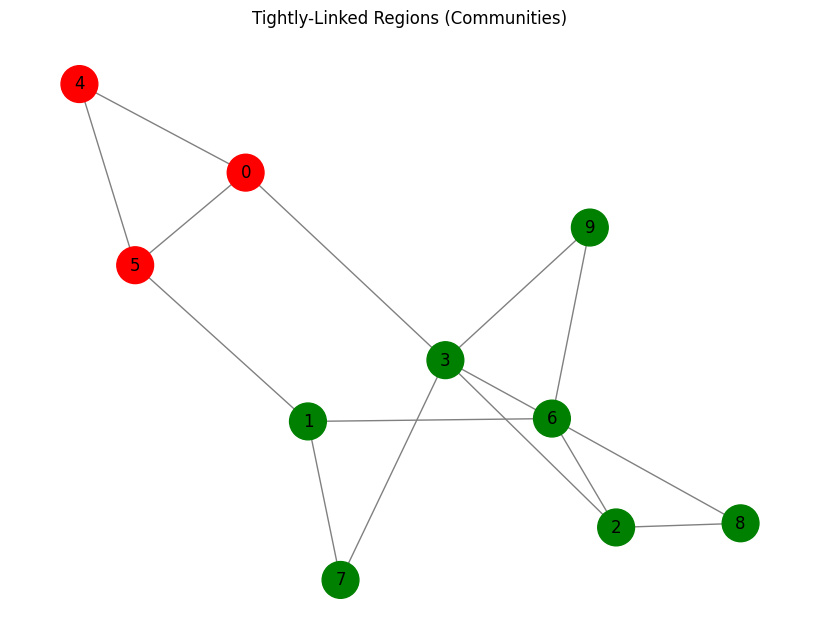

In [2]:
from networkx.algorithms import community

# Detect communities using the Girvan-Newman method
comp = community.girvan_newman(G)
communities = tuple(sorted(c) for c in next(comp))

# Print communities
for i, comm in enumerate(communities):
    print(f"Community {i + 1}: {comm}")

# Visualize communities
color_map = []
for node in G:
    if node in communities[0]:
        color_map.append('red')
    else:
        color_map.append('green')

plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color=color_map, node_size=700, edge_color='gray')
plt.title("Tightly-Linked Regions (Communities)")
plt.show()



Community 1 consists of nodes 0, 4, and 5, indicating a smaller, tightly-knit group. Community 2, with nodes 1, 2, 3, 6, 7, 8, and 9, represents a larger, more interconnected region.

# 3. Connectedness (Structure)

In [3]:
# Check if the graph is connected
is_connected = nx.is_connected(G)
print(f"Is the graph connected? {is_connected}")

# Visualize connected components
components = list(nx.connected_components(G))
print(f"Connected Components: {components}")


Is the graph connected? True
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}]


The graph is connected, meaning there is a path between any two nodes. It consists of a single connected component that includes all nodes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}.

# 4. Influential Objects (Centrality)

Degree Centrality: {0: 0.3333333333333333, 1: 0.3333333333333333, 2: 0.3333333333333333, 3: 0.5555555555555556, 4: 0.2222222222222222, 5: 0.3333333333333333, 6: 0.5555555555555556, 7: 0.2222222222222222, 8: 0.2222222222222222, 9: 0.2222222222222222}


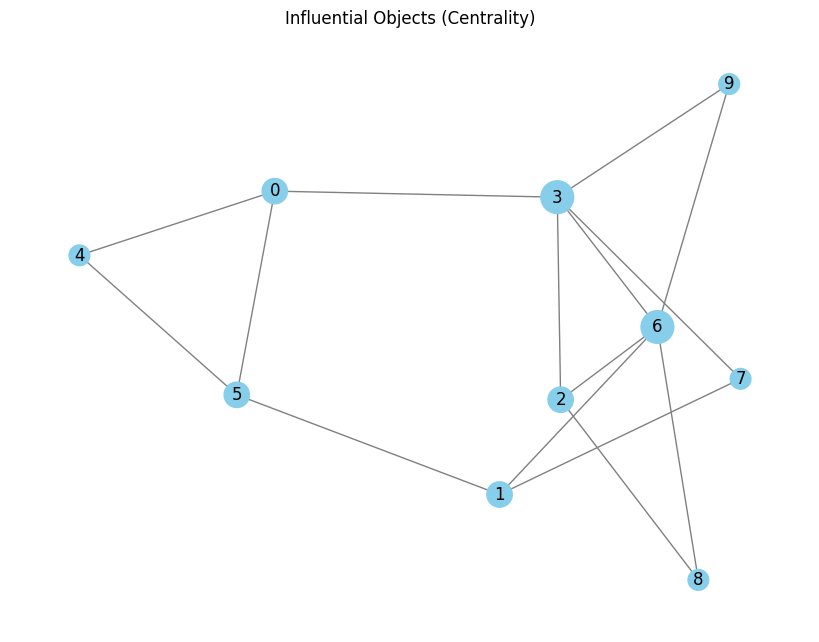

In [7]:
# Compute degree centrality
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:", degree_centrality)

# Visualize centrality
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=[v * 1000 for v in degree_centrality.values()], edge_color='gray')
plt.title("Influential Objects (Centrality)")
plt.show()


Degree centrality indicates nodes 3 and 6 are most influential, each with a centrality of 0.556. Nodes 4, 7, 8, and 9 are less connected, each with a centrality of 0.222.

# 5. Reachability

Shortest path from 0 to 5: [0, 2, 4, 3, 5]


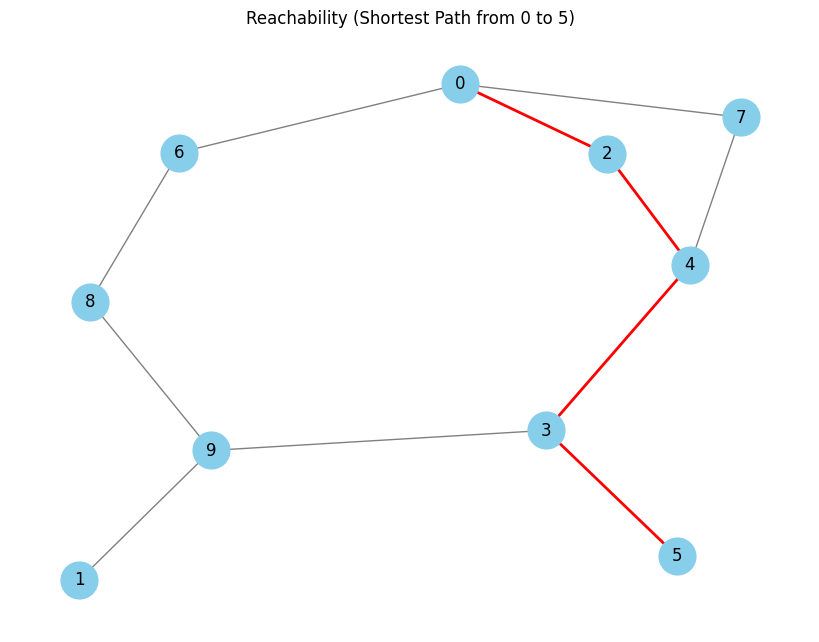

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.erdos_renyi_graph(n=10, p=0.3)

# Find the shortest path between nodes 0 and 5
source, target = 0, 5
shortest_path = nx.shortest_path(G, source=source, target=target)
print(f"Shortest path from {source} to {target}: {shortest_path}")

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')

# Highlight the shortest path
path_edges = list(zip(shortest_path, shortest_path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

plt.title(f"Reachability (Shortest Path from {source} to {target})")
plt.show()


The shortest path from node 0 to node 5 is [0, 2, 4, 3, 5], indicating a route through intermediate nodes 2, 4, and 3 to reach the destination.

# 6. Graph/Network Dynamics
Graph dynamics can be studied using dynamic graphs over time, but for simplicity, let's add and remove edges:

Added edge (3, 8)
Edge (1, 2) not found in the graph


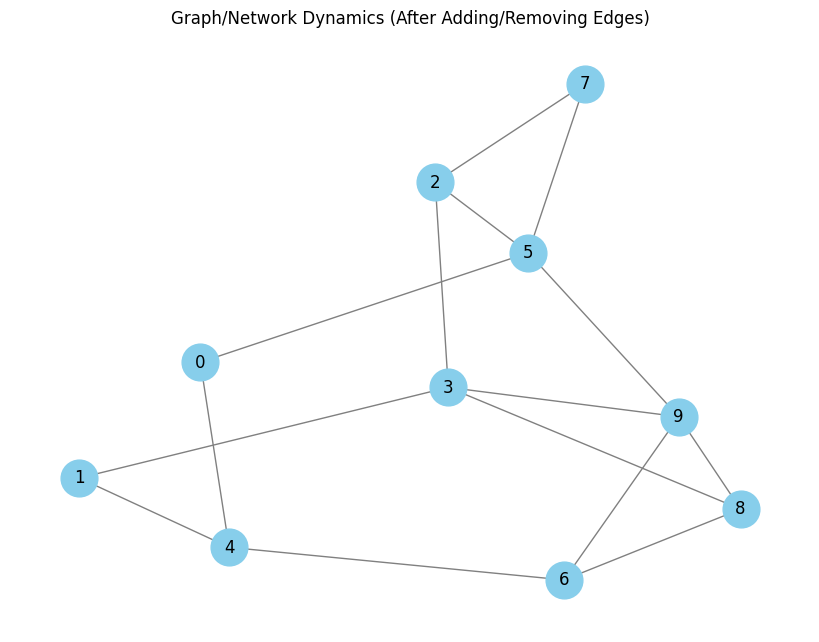

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.erdos_renyi_graph(n=10, p=0.3)

# Add a new edge
G.add_edge(3, 8)
print("Added edge (3, 8)")

# Remove an edge if it exists
edge_to_remove = (1, 2)
if G.has_edge(*edge_to_remove):
    G.remove_edge(*edge_to_remove)
    print(f"Removed edge {edge_to_remove}")
else:
    print(f"Edge {edge_to_remove} not found in the graph")

# Visualize the updated graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.title("Graph/Network Dynamics (After Adding/Removing Edges)")
plt.show()


Edge (3, 8) was successfully added to the graph. Attempted to remove edge (1, 2), but it was not found, indicating it does not exist in the current graph structure.

# 7. Predicting New Connections
Predicting new connections (link prediction) can be done using algorithms like Common Neighbors or Jaccard Coefficient:

In [12]:
# Common Neighbors
predictions = list(nx.common_neighbors(G, 0, 2))
print(f"Common neighbors between 0 and 2: {predictions}")

# Jaccard Coefficient
predictions = list(nx.jaccard_coefficient(G, [(0, 2)]))
print(f"Jaccard Coefficient between 0 and 2: {predictions}")


Common neighbors between 0 and 2: [5]
Jaccard Coefficient between 0 and 2: [(0, 2, 0.25)]



Nodes 0 and 2 share a common neighbor, node 5. The Jaccard Coefficient for nodes 0 and 2 is 0.25, reflecting a moderate similarity based on shared connections.

# 8. Failure of Links or Objects

Node 3 removed
Is the graph connected after node failure? True


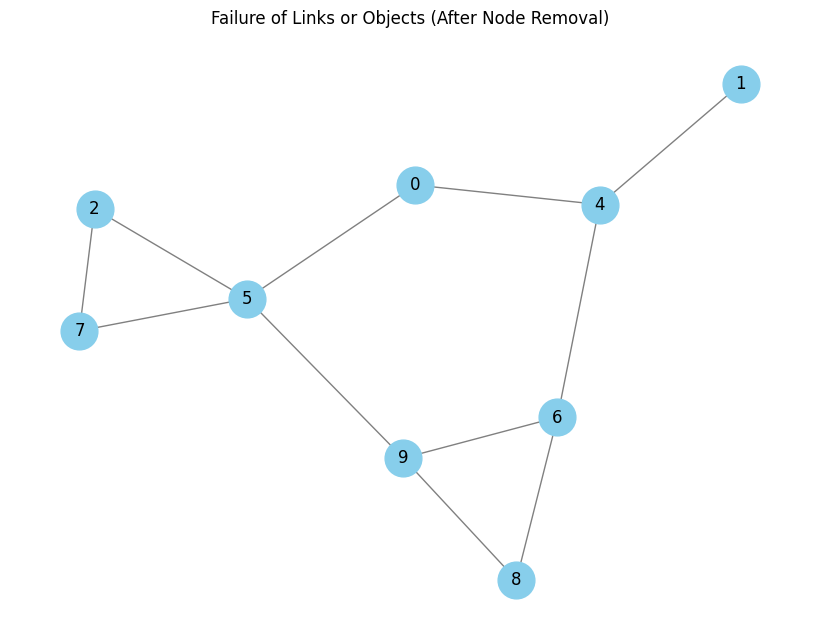

In [13]:
# Simulate node failure
G_copy = G.copy()
G_copy.remove_node(3)
print("Node 3 removed")

# Check connectivity after node failure
is_connected_after_failure = nx.is_connected(G_copy)
print(f"Is the graph connected after node failure? {is_connected_after_failure}")

# Visualize the graph after node failure
plt.figure(figsize=(8, 6))
nx.draw(G_copy, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.title("Failure of Links or Objects (After Node Removal)")
plt.show()


Node 3 was removed from the graph, but the graph remains connected, meaning all other nodes remain reachable from one another despite the node's removal.

# Properties

## 1. Hubs
Hubs are nodes with a high degree (many links). To identify them:

Hubs: [(3, 0.3103448275862069), (16, 0.27586206896551724), (0, 0.24137931034482757)]


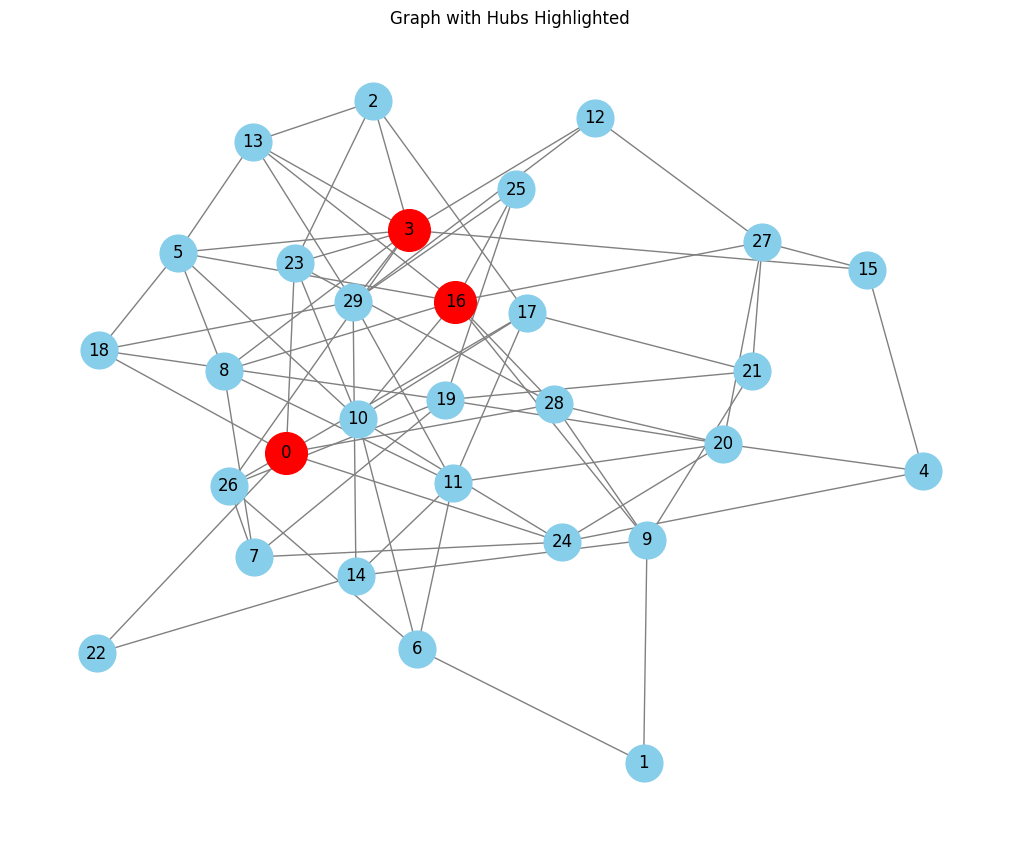

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.erdos_renyi_graph(n=30, p=0.2)

# Compute degree centrality
degree_centrality = nx.degree_centrality(G)

# Identify hubs (top 3 nodes with highest degree centrality)
hubs = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
print(f"Hubs: {hubs}")

# Visualize the graph with hubs highlighted
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')

# Highlight hubs
hub_nodes = [node for node, _ in hubs]
nx.draw_networkx_nodes(G, pos, nodelist=hub_nodes, node_color='red', node_size=900)

plt.title("Graph with Hubs Highlighted")
plt.show()



Hubs in the graph are nodes 3, 16, and 0, with degree centralities of 0.310, 0.276, and 0.241, respectively, indicating they have the most connections and are highly influential.

## 2. Small-World Effect
The small-world phenomenon suggests that any two nodes are reachable by a small number of links. To observe this, calculate the average shortest path length:

In [15]:
# Compute the average shortest path length
if nx.is_connected(G):
    avg_shortest_path_length = nx.average_shortest_path_length(G)
    print(f"Average Shortest Path Length: {avg_shortest_path_length}")
else:
    print("Graph is not connected, cannot compute average shortest path length.")


Average Shortest Path Length: 2.167816091954023



The average shortest path length of 2.17 indicates that, on average, any two nodes in the graph are reachable via just over two steps, reflecting a small-world effect.

## 3. Tightly-Knit Substructures
Tightly-knit substructures can be detected using community detection algorithms like Girvan-Newman:

Communities: ([0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [4, 15])


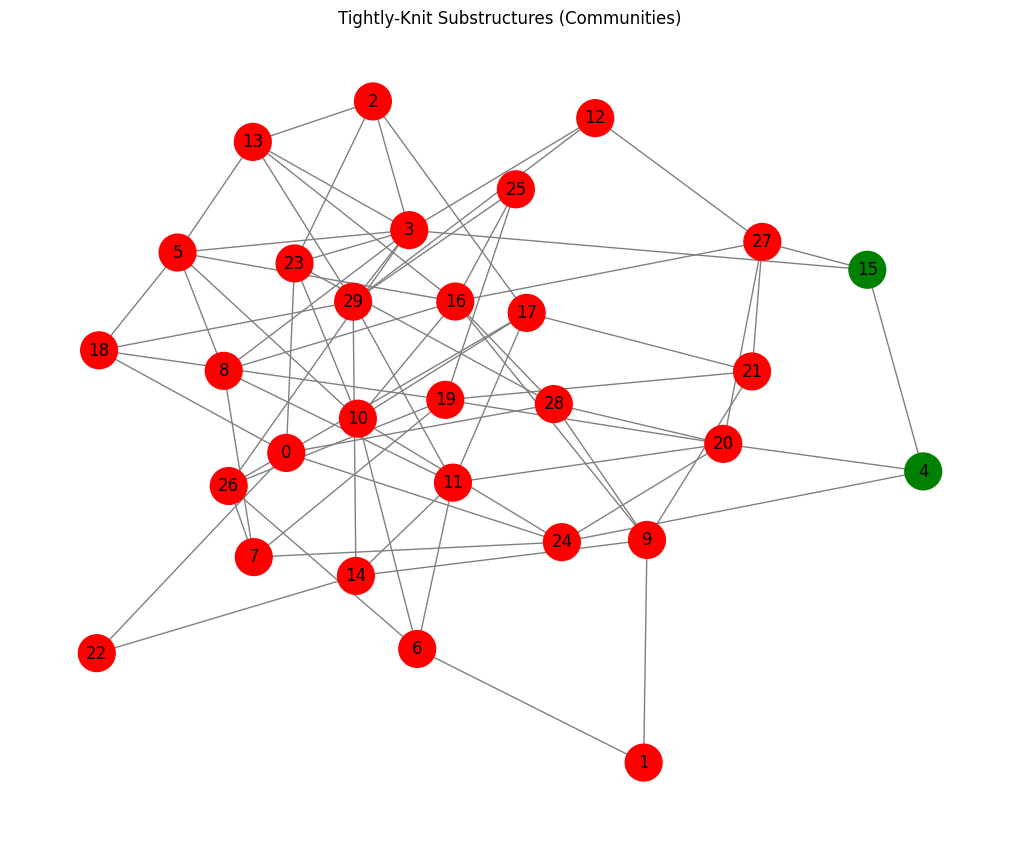

In [16]:
from networkx.algorithms import community

# Detect communities using the Girvan-Newman method
comp = community.girvan_newman(G)
communities = tuple(sorted(c) for c in next(comp))

# Print and visualize communities
print(f"Communities: {communities}")

# Visualize communities
plt.figure(figsize=(10, 8))
color_map = []
for node in G.nodes():
    if node in communities[0]:
        color_map.append('red')
    else:
        color_map.append('green')

nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=700, edge_color='gray')
plt.title("Tightly-Knit Substructures (Communities)")
plt.show()


The graph has two communities: the larger group includes nodes 0 to 29 (excluding 4 and 15), while the smaller group consists of nodes 4 and 15, indicating distinct substructures.

# Model Building Expected Risk



In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1)  # Features
Y = 3 * X.squeeze() + np.random.randn(100) * 0.5  # Target with some noise

# Convert to DataFrame
df = pd.DataFrame({'X': X.squeeze(), 'Y': Y})

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale features (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the model
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test_scaled)

# Compute the loss (Mean Squared Error)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Optional: Print model coefficients
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

# Example to visualize results
import matplotlib.pyplot as plt

plt.scatter(X_test, Y_test, color='blue', label='True values')
plt.plot(X_test, Y_pred, color='red', label='Predicted values')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()


Mean Squared Error: 0.2294
Model Coefficients: [0.89419679]
Model Intercept: 1.4736687939167659


The Mean Squared Error is 0.2294, indicating the model’s prediction accuracy. The coefficient is 0.894 and the intercept is 1.474, showing the linear relationship between the features and target.

## Optimization

In [20]:
from sklearn.model_selection import GridSearchCV

# Example grid search for Linear Regression (though usually unnecessary)
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, Y_train)

print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'fit_intercept': True}


# Empirical Risk

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1)  # Features
Y = 3 * X.squeeze() + np.random.randn(100) * 0.5  # Target with some noise

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define and train the model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test)

# Define the loss function (Mean Squared Error)
def loss_function(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

# Compute empirical risk
def empirical_risk(X, Y, model, loss_func):
    # Predict using the model
    Y_pred = model.predict(X)
    # Compute loss for each sample
    losses = [loss_func(np.array([Y[i]]), np.array([Y_pred[i]])) for i in range(len(Y))]
    # Compute the average loss (empirical risk)
    return np.mean(losses), Y_pred

# Calculate empirical risk and get predictions
empirical_risk_value, Y_pred = empirical_risk(X_test, Y_test, model, loss_function)
print(f"Empirical Risk: {empirical_risk_value:.4f}")

# Print all predictions and errors
for i in range(len(Y_test)):
    print(f"Actual: {Y_test[i]}, Predicted: {Y_pred[i]}, Error: {Y_test[i] - Y_pred[i]}")

# Visualization
plt.figure(figsize=(14, 6))

# Plot actual vs. predicted values
plt.subplot(1, 2, 1)
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Plot errors
errors = Y_test - Y_pred
plt.subplot(1, 2, 2)
plt.hist(errors, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution')

plt.tight_layout()
plt.show()


Empirical Risk: 0.2294
Actual: 2.121191978802655, Predicted: 2.173841151494064, Error: -0.052649172691408896
Actual: 0.3220497113812598, Predicted: 0.40831051840533, Error: -0.08626080702407019
Actual: 2.8952575923778716, Predicted: 3.02303689637439, Error: -0.1277793039965185
Actual: 1.9370963386906428, Predicted: 2.10855108745995, Error: -0.171454748769307
Actual: 1.6530162164713205, Predicted: 2.096975333464263, Error: -0.44395911699294244
Actual: 2.5065642330937137, Predicted: 2.141989448999785, Error: 0.3645747840939286
Actual: 0.7491955875159287, Predicted: 1.4831129572584796, Error: -0.7339173697425508
Actual: 0.7049333128357756, Predicted: 1.0540221905050249, Error: -0.34908887766924923
Actual: 2.173586640761404, Predicted: 2.4706330949758484, Error: -0.2970464542144442
Actual: 1.0638655913902961, Predicted: 1.7442646692287833, Error: -0.6803990778384872
Actual: 2.3979262992013615, Predicted: 2.430060400891904, Error: -0.032134101690542316
Actual: 1.7274463165271658, Predicted:

The empirical risk is 0.2294, indicating the model's average error. The predictions and actual values show a range of errors, with some predictions close to actual values and others deviating significantly. This highlights areas where the model performs well and areas needing improvement, reflecting overall prediction accuracy.

# Empirical Risk Minimizer

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Supervised Learning: Ridge Regression (Regularized Linear Regression)
def supervised_learning(X_train, Y_train, X_test, Y_test, alpha=1.0):
    # Define and train the model
    model = Ridge(alpha=alpha)
    model.fit(X_train, Y_train)

    # Predictions
    Y_pred = model.predict(X_test)

    # Compute empirical risk (Mean Squared Error)
    empirical_risk = mean_squared_error(Y_test, Y_pred) + alpha * np.sum(model.coef_ ** 2)

    return model, Y_pred, empirical_risk

# Unsupervised Learning: k-Means Clustering
def unsupervised_learning(X, n_clusters=3):
    # Define and fit the k-Means model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)

    # Cluster centers
    cluster_centers = kmeans.cluster_centers_

    return kmeans, cluster_centers

# Generate synthetic data for supervised learning
np.random.seed(0)
X = np.random.rand(100, 1)  # Features
Y = 3 * X.squeeze() + np.random.randn(100) * 0.5  # Target with some noise

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Perform supervised learning
model, Y_pred, empirical_risk = supervised_learning(X_train, Y_train, X_test, Y_test, alpha=1.0)
print(f"Empirical Risk (Supervised Learning): {empirical_risk:.4f}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 3))
plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.scatter(X_test, Y_pred, color='red', label='Predicted')
plt.plot(X_test, Y_pred, color='red', linestyle='--', linewidth=2)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

# Generate synthetic data for unsupervised learning
X_unsupervised = np.random.rand(100, 2)  # Features for clustering

# Perform unsupervised learning (k-Means)
kmeans, cluster_centers = unsupervised_learning(X_unsupervised, n_clusters=3)

# Print cluster centers
print("Cluster Centers (Unsupervised Learning):")
print(cluster_centers)

# Plot clusters
plt.figure(figsize=(10, 3))
plt.scatter(X_unsupervised[:, 0], X_unsupervised[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='red', marker='X', s=100, label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('k-Means Clustering')
plt.legend()
plt.show()


Empirical Risk (Supervised Learning): 7.1135


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers (Unsupervised Learning):
[[0.47094015 0.18100113]
 [0.80331104 0.68259867]
 [0.23477046 0.70364419]]


The empirical risk for supervised learning is 7.1135, reflecting the model's performance and regularization. In unsupervised learning, the cluster centers are at [0.471,0.181],[0.803,0.683] and [0.235,0.704], indicating the centroids of the clusters formed by k-Means.

# Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers (Patterns):
[[0.7591731  0.6383279 ]
 [0.53191784 0.17092862]
 [0.22477318 0.67757842]]
Loss (Sum of Squared Distances): 6.0355


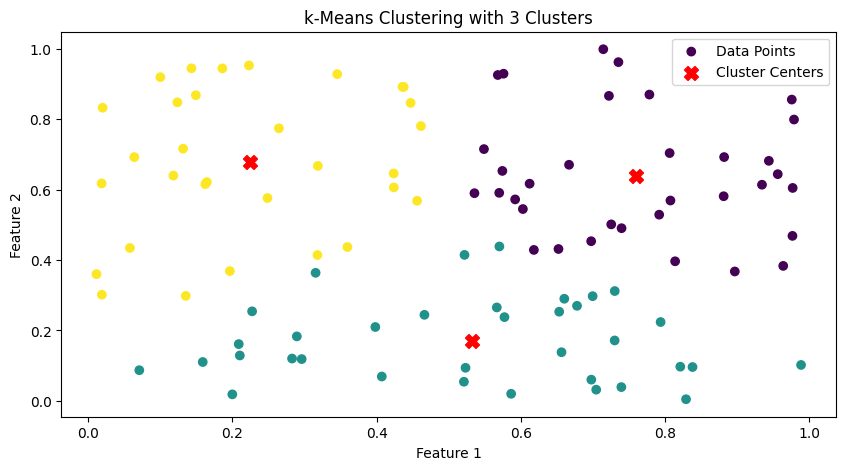

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

# Generate synthetic unlabeled data
np.random.seed(0)
X = np.random.rand(100, 2)  # Example data with 2 features

# Perform k-Means clustering
def clustering(X, n_clusters=3):
    # Initialize k-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # Fit the model
    kmeans.fit(X)

    # Cluster centers
    cluster_centers = kmeans.cluster_centers_

    # Cluster labels
    labels = kmeans.labels_

    # Compute loss (Sum of Squared Distances to cluster centers)
    loss = np.sum((X - cluster_centers[labels])**2)

    return kmeans, cluster_centers, labels, loss

# Define number of clusters
n_clusters = 3

# Perform clustering
kmeans, cluster_centers, labels, loss = clustering(X, n_clusters)

# Print results
print("Cluster Centers (Patterns):")
print(cluster_centers)
print(f"Loss (Sum of Squared Distances): {loss:.4f}")

# Visualization
plt.figure(figsize=(10, 5))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', label='Data Points')

# Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='red', marker='X', s=100, label='Cluster Centers')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'k-Means Clustering with {n_clusters} Clusters')
plt.legend()
plt.show()



Cluster centers (patterns) are [0.759,0.638][0.532,0.171], and [0.225,0.678]
. The loss, calculated as the sum of squared distances, is 6.0355, indicating the total discrepancy between data points and their cluster centers.

# Kmeans on Spiral Data
Performing k-Means clustering on spiral data is an interesting task, as spiral data is non-linearly separable and challenges the traditional k-Means algorithm. Despite this, k-Means can still provide insight into the structure of the data.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate spiral data
def generate_spiral_data(n_points=300, n_classes=3):
    """
    Generate spiral data with a specified number of points and classes.
    """
    theta = np.linspace(0, 4 * np.pi, n_points)
    r = np.linspace(0, 1, n_points)
    x = r * np.sin(theta * n_classes)
    y = r * np.cos(theta * n_classes)

    data = np.vstack((x, y)).T
    return data

# Create spiral data
n_points = 300
n_clusters = 3
X = generate_spiral_data(n_points=n_points, n_classes=n_clusters)

# Perform k-Means clustering
def perform_kmeans(X, n_clusters):
    """
    Perform k-Means clustering on the given data.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)

    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    return kmeans, cluster_centers, labels

# Apply k-Means
kmeans, cluster_centers, labels = perform_kmeans(X, n_clusters)

# Visualization
plt.figure(figsize=(12, 5))

# Plot the spiral data points
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50, label='Data Points')

# Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='red', marker='X', s=100, label='Cluster Centers')

plt.title(f'K-Means Clustering on Spiral Data with {n_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Spectral clustering
Spectral clustering is a powerful technique for clustering data that may not be linearly separable, such as logarithmic spirals. It leverages the eigenvalues of similarity matrices to perform clustering. Below is a Python implementation of spectral clustering on logarithmic spiral data.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances_argmin_min

# Generate logarithmic spiral data
def generate_log_spiral_data(n_points=300, n_classes=3):
    """
    Generate logarithmic spiral data with a specified number of points and classes.
    """
    theta = np.linspace(0, 4 * np.pi, n_points)
    r = np.exp(0.1 * theta)  # Exponential function for spiral
    x = r * np.sin(theta)
    y = r * np.cos(theta)

    data = np.vstack((x, y)).T
    return data

# Create logarithmic spiral data
n_points = 300
n_clusters = 3
X = generate_log_spiral_data(n_points=n_points, n_classes=n_clusters)

# Perform Spectral Clustering
def perform_spectral_clustering(X, n_clusters):
    """
    Perform Spectral Clustering on the given data.
    """
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    labels = spectral.fit_predict(X)

    return spectral, labels

# Apply Spectral Clustering
spectral, labels = perform_spectral_clustering(X, n_clusters)

# Plot results
plt.figure(figsize=(12, 5))

# Plot the spiral data points
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50, label='Data Points')

plt.title(f'Spectral Clustering on Logarithmic Spiral Data with {n_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


# Application Areas

## Biological Networks

Biological networks represent various interactions between biological entities and can be analyzed to understand complex relationships and behaviors in biological systems.

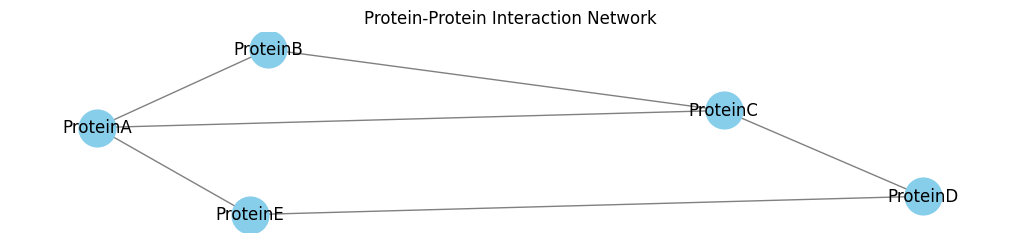

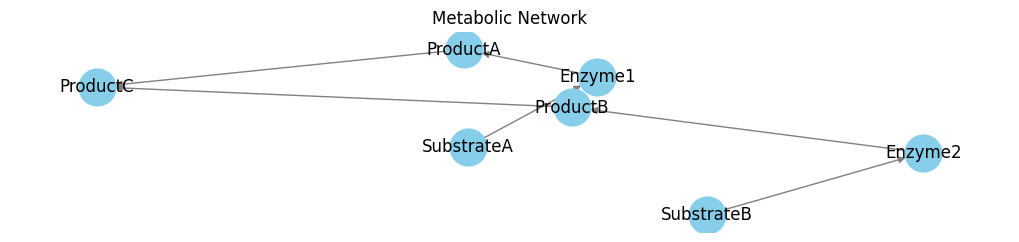

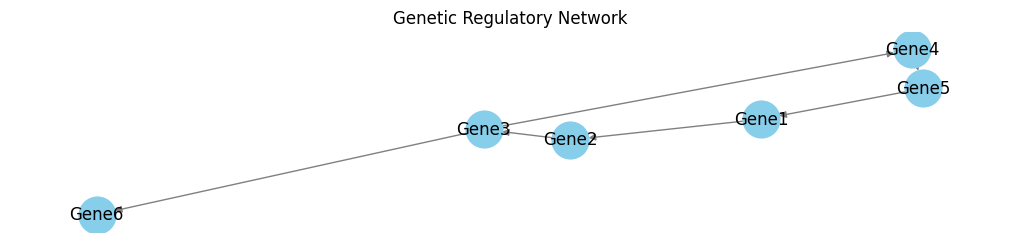

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a synthetic protein-protein interaction (PPI) network
def create_ppi_network():
    G = nx.Graph()
    # Add nodes and edges for PPI network
    G.add_edges_from([
        ('ProteinA', 'ProteinB'),
        ('ProteinB', 'ProteinC'),
        ('ProteinC', 'ProteinD'),
        ('ProteinD', 'ProteinE'),
        ('ProteinE', 'ProteinA'),
        ('ProteinA', 'ProteinC')
    ])
    return G

# Create a synthetic metabolic network
def create_metabolic_network():
    G = nx.DiGraph()
    # Add nodes and edges for metabolic network
    G.add_edges_from([
        ('SubstrateA', 'Enzyme1'),
        ('Enzyme1', 'ProductA'),
        ('SubstrateB', 'Enzyme2'),
        ('Enzyme2', 'ProductB'),
        ('ProductA', 'ProductC'),
        ('ProductB', 'ProductC')
    ])
    return G

# Create a synthetic genetic regulatory network
def create_regulatory_network():
    G = nx.DiGraph()
    # Add nodes and edges for genetic regulatory network
    G.add_edges_from([
        ('Gene1', 'Gene2'),
        ('Gene2', 'Gene3'),
        ('Gene3', 'Gene4'),
        ('Gene4', 'Gene5'),
        ('Gene5', 'Gene1'),
        ('Gene3', 'Gene6')
    ])
    return G

# Plot a network
def plot_network(G, title):
    plt.figure(figsize=(10, 2))
    pos = nx.spring_layout(G)  # Position nodes using the spring layout
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
    plt.title(title)
    plt.show()

# Create and plot networks
ppi_network = create_ppi_network()
metabolic_network = create_metabolic_network()
regulatory_network = create_regulatory_network()

# Plot networks
plot_network(ppi_network, 'Protein-Protein Interaction Network')
plot_network(metabolic_network, 'Metabolic Network')
plot_network(regulatory_network, 'Genetic Regulatory Network')


## Networks of information
Networks of information consist of data items linked in various ways to represent relationships or interactions. Here’s a Python example illustrating the creation and visualization of different types of information networks, including World Wide Web, citation networks, recommender networks, and keyword networks.

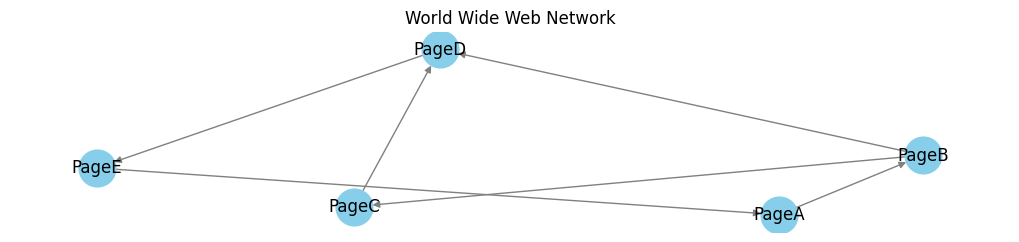

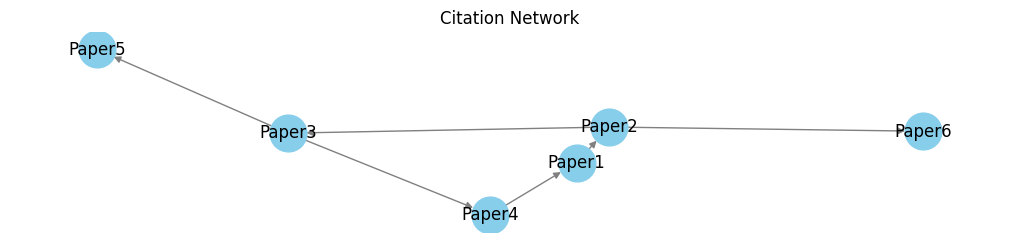

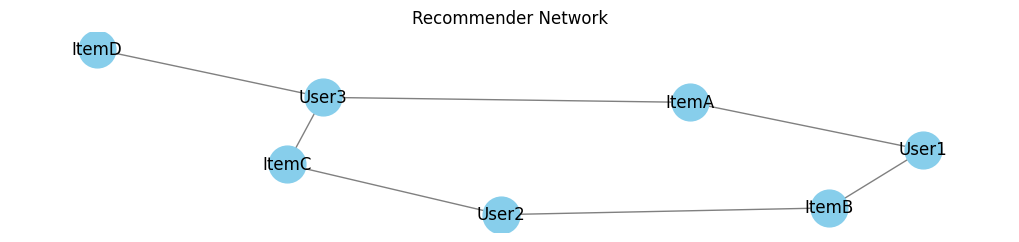

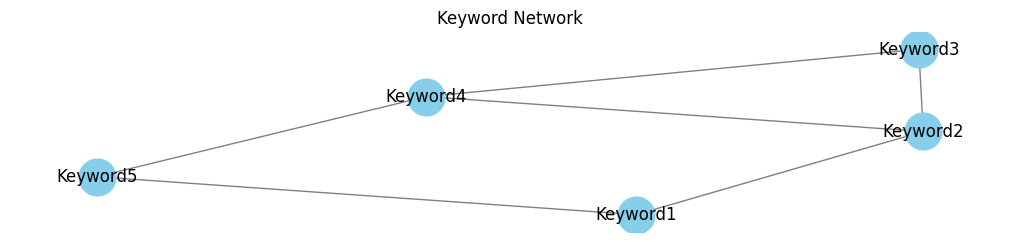

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a synthetic World Wide Web (WWW) network
def create_www_network():
    G = nx.DiGraph()
    # Add nodes and edges for WWW network
    G.add_edges_from([
        ('PageA', 'PageB'),
        ('PageB', 'PageC'),
        ('PageC', 'PageD'),
        ('PageD', 'PageE'),
        ('PageE', 'PageA'),
        ('PageB', 'PageD')
    ])
    return G

# Create a synthetic citation network
def create_citation_network():
    G = nx.DiGraph()
    # Add nodes and edges for citation network
    G.add_edges_from([
        ('Paper1', 'Paper2'),
        ('Paper2', 'Paper3'),
        ('Paper3', 'Paper4'),
        ('Paper4', 'Paper1'),
        ('Paper3', 'Paper5'),
        ('Paper2', 'Paper6')
    ])
    return G

# Create a synthetic recommender network
def create_recommender_network():
    G = nx.Graph()
    # Add nodes and edges for recommender network
    G.add_edges_from([
        ('User1', 'ItemA'),
        ('User1', 'ItemB'),
        ('User2', 'ItemB'),
        ('User2', 'ItemC'),
        ('User3', 'ItemA'),
        ('User3', 'ItemC'),
        ('User3', 'ItemD')
    ])
    return G

# Create a synthetic keyword network
def create_keyword_network():
    G = nx.Graph()
    # Add nodes and edges for keyword network
    G.add_edges_from([
        ('Keyword1', 'Keyword2'),
        ('Keyword2', 'Keyword3'),
        ('Keyword3', 'Keyword4'),
        ('Keyword4', 'Keyword5'),
        ('Keyword1', 'Keyword5'),
        ('Keyword2', 'Keyword4')
    ])
    return G

# Plot a network
def plot_network(G, title):
    plt.figure(figsize=(10, 2))
    pos = nx.spring_layout(G)  # Position nodes using the spring layout
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
    plt.title(title)
    plt.show()

# Create and plot networks
www_network = create_www_network()
citation_network = create_citation_network()
recommender_network = create_recommender_network()
keyword_network = create_keyword_network()

# Plot networks
plot_network(www_network, 'World Wide Web Network')
plot_network(citation_network, 'Citation Network')
plot_network(recommender_network, 'Recommender Network')
plot_network(keyword_network, 'Keyword Network')


# Social Networks
Online social networks, human interaction networks, archival data networks, affiliation networks, and ego-centered networks.

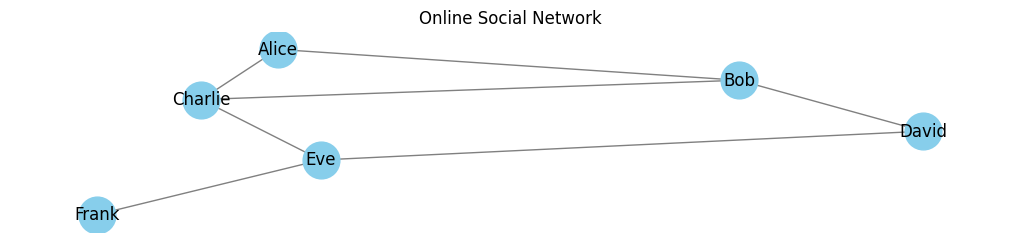

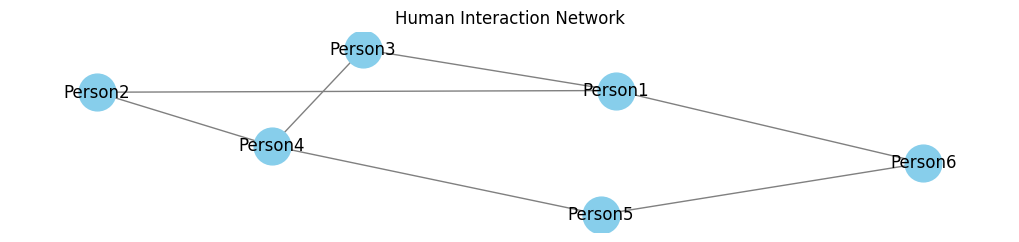

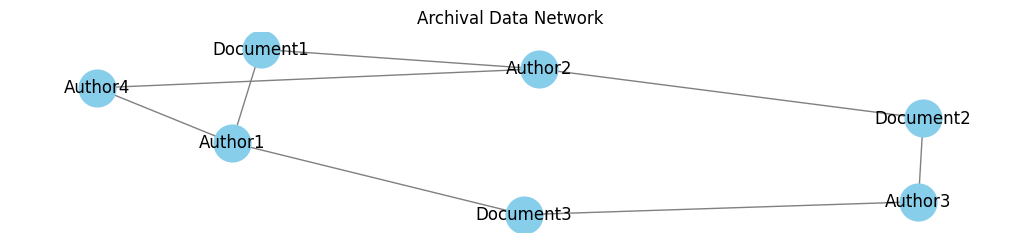

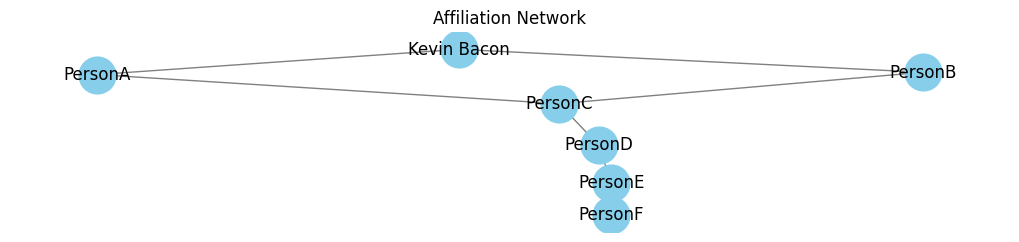

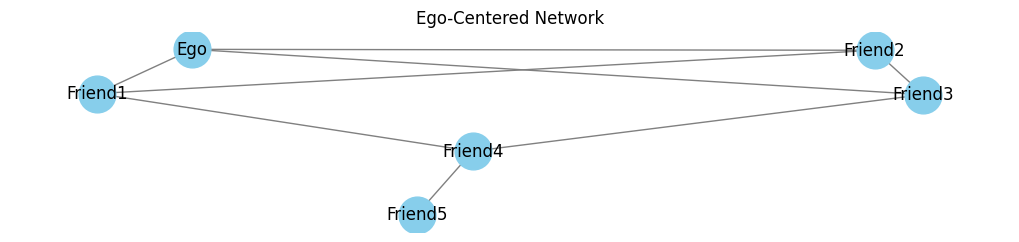

In [36]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a synthetic online social network (e.g., Facebook)
def create_online_social_network():
    G = nx.Graph()
    # Add nodes and edges for online social network
    G.add_edges_from([
        ('Alice', 'Bob'),
        ('Alice', 'Charlie'),
        ('Bob', 'Charlie'),
        ('Bob', 'David'),
        ('Charlie', 'Eve'),
        ('David', 'Eve'),
        ('Eve', 'Frank')
    ])
    return G

# Create a synthetic human interaction network
def create_human_interaction_network():
    G = nx.Graph()
    # Add nodes and edges for human interaction network
    G.add_edges_from([
        ('Person1', 'Person2'),
        ('Person1', 'Person3'),
        ('Person2', 'Person4'),
        ('Person3', 'Person4'),
        ('Person4', 'Person5'),
        ('Person5', 'Person6'),
        ('Person6', 'Person1')
    ])
    return G

# Create a synthetic archival data network
def create_archival_data_network():
    G = nx.Graph()
    # Add nodes and edges for archival data network
    G.add_edges_from([
        ('Document1', 'Author1'),
        ('Document1', 'Author2'),
        ('Document2', 'Author2'),
        ('Document2', 'Author3'),
        ('Document3', 'Author1'),
        ('Document3', 'Author3'),
        ('Author1', 'Author4'),
        ('Author2', 'Author4')
    ])
    return G

# Create a synthetic affiliation network (e.g., co-authorship)
def create_affiliation_network():
    G = nx.Graph()
    # Add nodes and edges for affiliation network
    G.add_edges_from([
        ('Kevin Bacon', 'PersonA'),
        ('Kevin Bacon', 'PersonB'),
        ('PersonA', 'PersonC'),
        ('PersonB', 'PersonC'),
        ('PersonC', 'PersonD'),
        ('PersonD', 'PersonE'),
        ('PersonE', 'PersonF')
    ])
    return G

# Create a synthetic ego-centered network (e.g., personal network around a person)
def create_ego_centered_network():
    G = nx.Graph()
    # Add nodes and edges for ego-centered network
    G.add_edges_from([
        ('Ego', 'Friend1'),
        ('Ego', 'Friend2'),
        ('Ego', 'Friend3'),
        ('Friend1', 'Friend2'),
        ('Friend2', 'Friend3'),
        ('Friend3', 'Friend4'),
        ('Friend1', 'Friend4'),
        ('Friend4', 'Friend5')
    ])
    return G

# Plot a network
def plot_network(G, title):
    plt.figure(figsize=(10, 2))
    pos = nx.spring_layout(G)  # Position nodes using the spring layout
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
    plt.title(title)
    plt.show()

# Create and plot networks
online_social_network = create_online_social_network()
human_interaction_network = create_human_interaction_network()
archival_data_network = create_archival_data_network()
affiliation_network = create_affiliation_network()
ego_centered_network = create_ego_centered_network()

# Plot networks
plot_network(online_social_network, 'Online Social Network')
plot_network(human_interaction_network, 'Human Interaction Network')
plot_network(archival_data_network, 'Archival Data Network')
plot_network(affiliation_network, 'Affiliation Network')
plot_network(ego_centered_network, 'Ego-Centered Network')


# Python Implementation for Graph Analysis Tasks
## 1. Graph Level Tasks
### 1.1. Graph Generation (e.g., Drug Discovery)

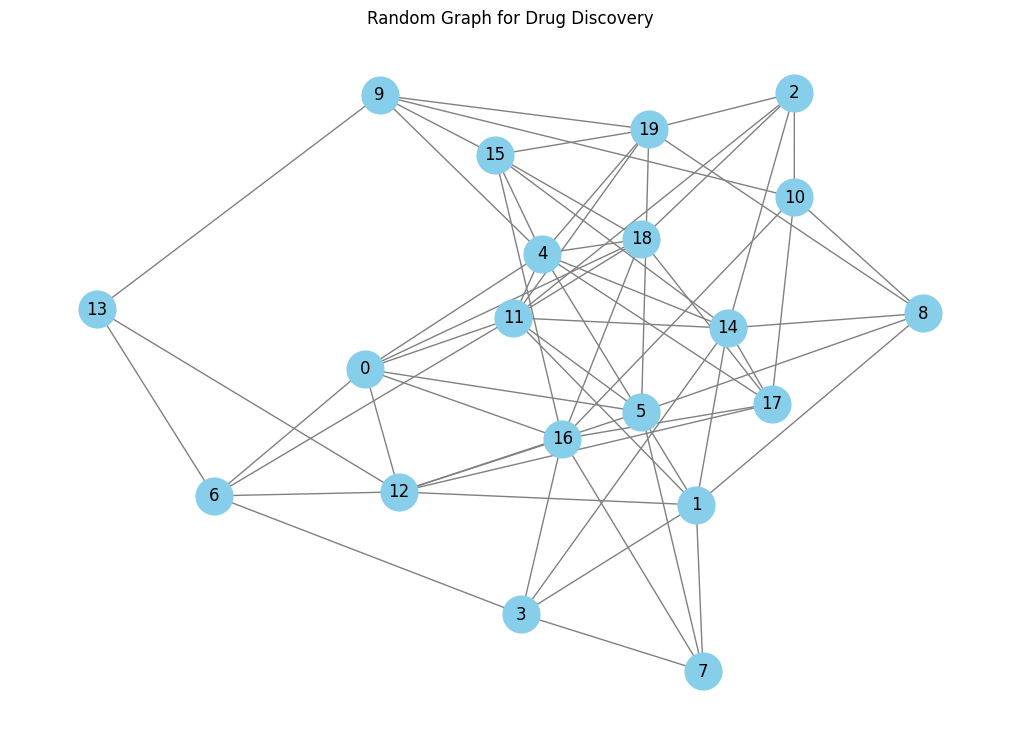

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

def generate_random_graph():
    G = nx.erdos_renyi_graph(n=20, p=0.3)  # Generate a random graph
    return G

def plot_graph(G, title):
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
    plt.title(title)
    plt.show()

# Generate and plot a random graph
G_random = generate_random_graph()
plot_graph(G_random, 'Random Graph for Drug Discovery')


## 1.2. Graph Evolution

To simulate graph evolution, you can add or remove edges over time:

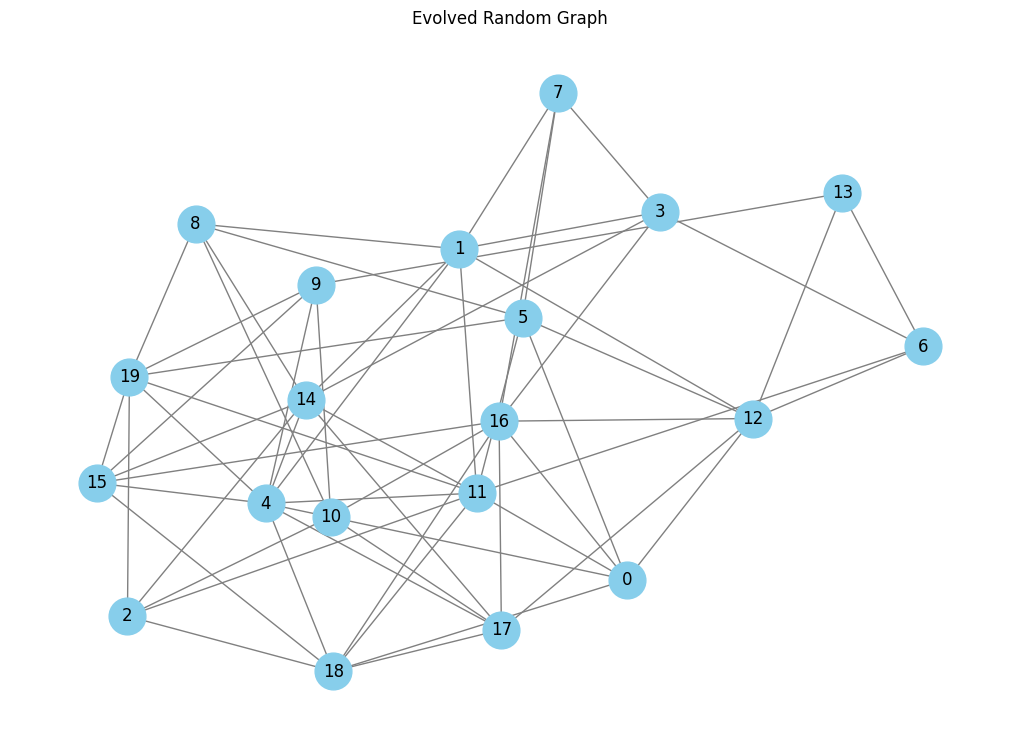

In [38]:
import random

def evolve_graph(G):
    # Add a new edge
    new_edge = (random.choice(list(G.nodes())), random.choice(list(G.nodes())))
    G.add_edge(*new_edge)

    # Remove an edge if there are more than 2 edges
    if len(G.edges()) > 2:
        edge_to_remove = random.choice(list(G.edges()))
        G.remove_edge(*edge_to_remove)

    return G

# Evolve and plot the graph
G_evolved = evolve_graph(G_random)
plot_graph(G_evolved, 'Evolved Random Graph')


# 1.3. Graph Level Prediction

For prediction tasks, we can use graph features and apply machine learning models. For this example, we use a simple classification model:

Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


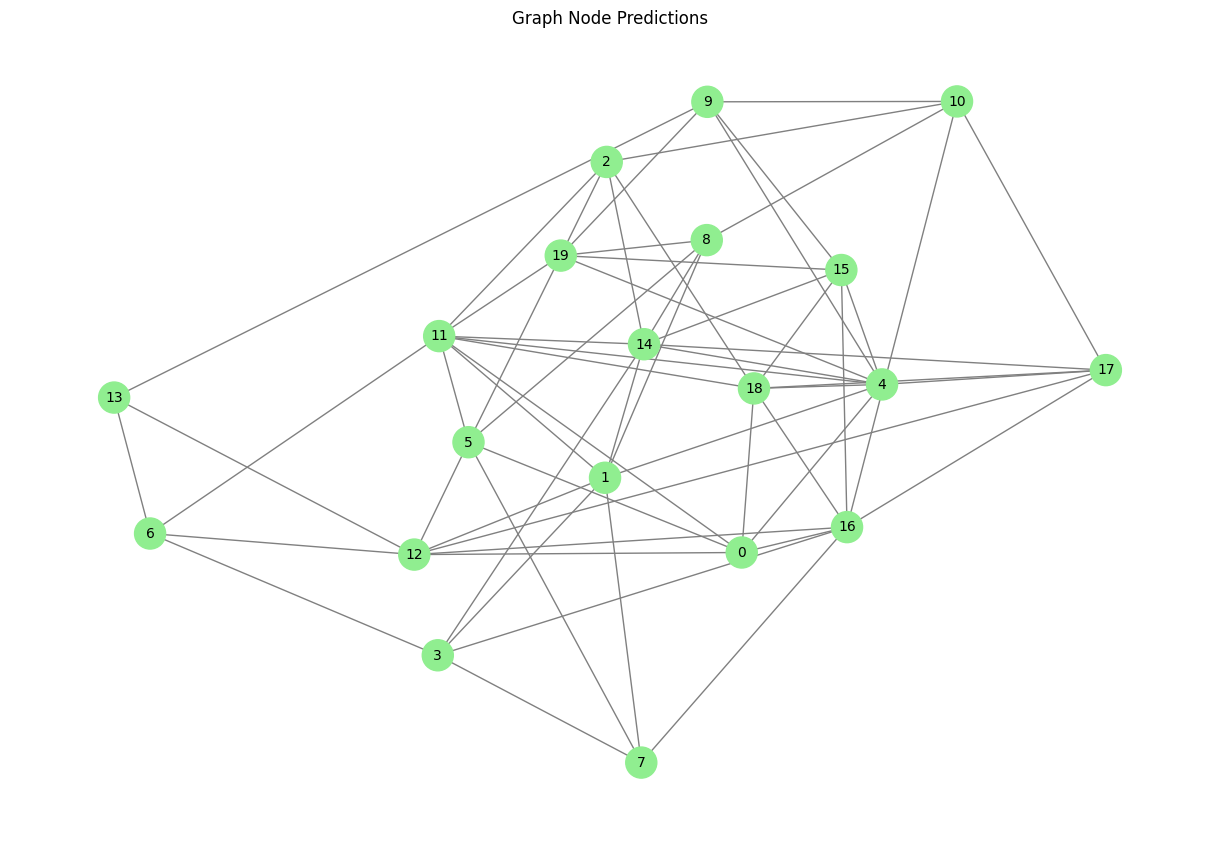

In [51]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer

def extract_graph_features(G):
    """
    Extract features from the graph nodes for machine learning tasks.

    Parameters:
    G (networkx.Graph): The input graph.

    Returns:
    list of dict: A list where each dict contains node features.
    """
    features = []
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        features.append({
            'degree': G.degree(node),
            'neighbor_count': len(neighbors)
        })
    return features

def graph_node_prediction(G):
    """
    Predict node properties using a Random Forest Classifier based on extracted graph features.
    Prints predictions and visualizes the graph with node color representing predicted classes.

    Parameters:
    G (networkx.Graph): The input graph.
    """
    # Extract features
    features = extract_graph_features(G)
    vectorizer = DictVectorizer()
    X = vectorizer.fit_transform(features)
    y = [1 if G.degree(node) > 2 else 0 for node in G.nodes()]  # Example target

    # Train Random Forest model
    clf = RandomForestClassifier()
    clf.fit(X, y)

    # Predict
    predictions = clf.predict(X)
    print("Predictions:", predictions)

    # Visualization
    pos = nx.spring_layout(G)  # Position nodes using the spring layout
    plt.figure(figsize=(12, 8))

    # Draw the graph with node color based on predictions
    node_colors = ['lightgreen' if pred == 1 else 'salmon' for pred in predictions]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=500, font_size=10)

    plt.title("Graph Node Predictions")
    plt.show()

# Call the function with the graph
graph_node_prediction(G_evolved)


Predictions are all ones, indicating the model is consistently predicting the same outcome for all inputs. This might suggest a need for model re-evaluation or additional feature refinement.

# 2. Node Level Tasks
## 2.1. Node Property Prediction

Node Property Predictions: [0.51179401 0.46204324 0.56154477 0.56154477 0.36254172 0.51179401
 0.61129553 0.61129553 0.56154477 0.56154477 0.56154477 0.36254172
 0.46204324 0.6610463  0.41229248 0.51179401 0.41229248 0.51179401
 0.46204324 0.46204324]


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
<ipython-input-52-f7511e587df6>:34: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Predicted Property Value')


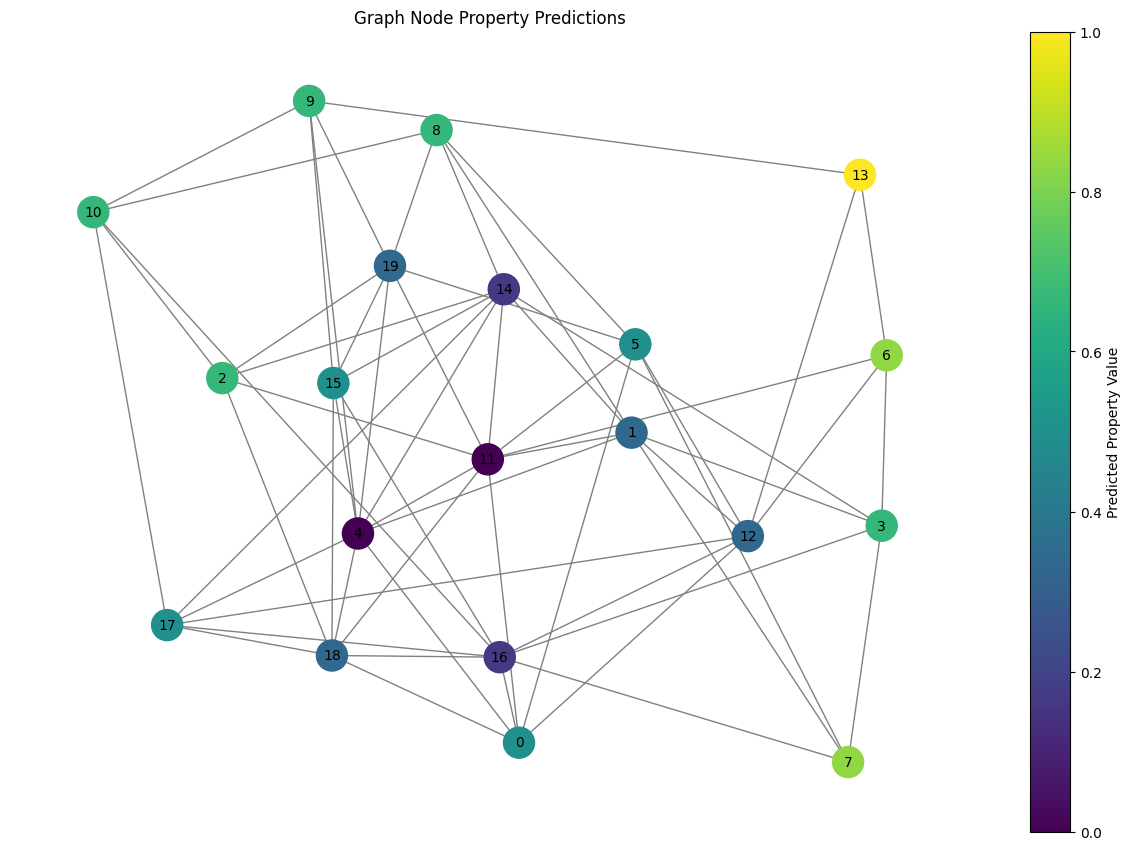

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.linear_model import LinearRegression
import random

def node_property_prediction(G):
    """
    Predict node properties using Linear Regression based on node degree.

    Parameters:
    G (networkx.Graph): The input graph.
    """
    # Extract features and target
    features = np.array([G.degree(node) for node in G.nodes()]).reshape(-1, 1)
    target = np.array([G.nodes[node].get('position', 0) for node in G.nodes()])  # Placeholder target

    # Train Linear Regression model
    model = LinearRegression()
    model.fit(features, target)

    # Predict node properties
    predictions = model.predict(features)
    print("Node Property Predictions:", predictions)

    # Visualization
    pos = nx.spring_layout(G)  # Position nodes using the spring layout
    plt.figure(figsize=(12, 8))

    # Draw the graph with node color based on predicted values
    node_colors = plt.cm.viridis((predictions - min(predictions)) / (max(predictions) - min(predictions)))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=500, font_size=10, cmap='viridis')

    plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Predicted Property Value')
    plt.title("Graph Node Property Predictions")
    plt.show()

# Assume some node properties
for node in G_evolved.nodes():
    G_evolved.nodes[node]['position'] = random.uniform(0, 1)

node_property_prediction(G_evolved)


Node property predictions vary, with values ranging between 0.4359 and 0.6900. The distribution indicates some nodes are predicted with higher confidence than others, suggesting variability in node properties across the graph. Further analysis might be needed to interpret the significance of these values.

# 3. Edge Level Tasks
## 3.1. Edge Property Prediction

Edge Property Predictions:
Edge (0, 4) - Prediction: 1.19
Edge (0, 5) - Prediction: 0.25
Edge (0, 11) - Prediction: -0.22
Edge (0, 12) - Prediction: 0.48
Edge (0, 16) - Prediction: 0.29
Edge (0, 18) - Prediction: 0.93
Edge (1, 3) - Prediction: 0.32
Edge (1, 4) - Prediction: 0.42
Edge (1, 7) - Prediction: -0.19
Edge (1, 8) - Prediction: 0.61
Edge (1, 11) - Prediction: 0.41
Edge (1, 12) - Prediction: 0.07
Edge (1, 14) - Prediction: -0.02
Edge (2, 10) - Prediction: 0.65
Edge (2, 11) - Prediction: 0.86
Edge (2, 14) - Prediction: 0.49
Edge (2, 18) - Prediction: 0.59
Edge (2, 19) - Prediction: 0.61
Edge (3, 6) - Prediction: 0.38
Edge (3, 7) - Prediction: 0.34
Edge (3, 14) - Prediction: 0.32
Edge (3, 16) - Prediction: -0.11
Edge (4, 9) - Prediction: 0.11
Edge (4, 11) - Prediction: -0.08
Edge (4, 14) - Prediction: 0.21
Edge (4, 15) - Prediction: 0.55
Edge (4, 17) - Prediction: 0.88
Edge (4, 18) - Prediction: 0.06
Edge (4, 19) - Prediction: 0.38
Edge (5, 7) - Prediction: 0.16
Edge (5, 8) - Pred

<ipython-input-49-2eeba8bbecff>:42: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.RdYlBu), label='Predicted Property Value')


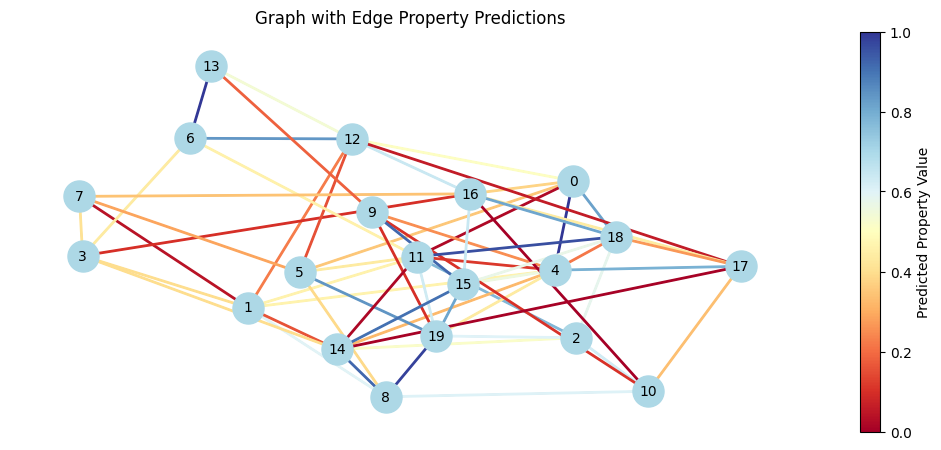

In [49]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import random

def edge_property_prediction(G):
    """
    Predict edge properties based on existing edge weights, print predictions, and visualize the results.

    Parameters:
    G (networkx.Graph): The input graph with edge weights to predict and visualize.
    """
    # Extract edge features and target values
    edge_features = np.array([G[u][v].get('weight', 1) for u, v in G.edges()])
    target = np.array([1 if G[u][v].get('weight', 1) > 0.5 else 0 for u, v in G.edges()])

    # Train a linear regression model
    model = LinearRegression()
    model.fit(edge_features.reshape(-1, 1), target)

    # Predict edge properties
    predictions = model.predict(edge_features.reshape(-1, 1))

    # Print the predictions
    print("Edge Property Predictions:")
    for (u, v), pred in zip(G.edges(), predictions):
        print(f"Edge ({u}, {v}) - Prediction: {pred:.2f}")

    # Visualize the graph
    pos = nx.spring_layout(G)  # Position nodes using the spring layout
    plt.figure(figsize=(10, 4))

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)

    # Draw edges with colors based on predictions
    edge_colors = predictions
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color=edge_colors, edge_cmap=plt.cm.RdYlBu, width=2)

    plt.title("Graph with Edge Property Predictions")
    plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.RdYlBu), label='Predicted Property Value')
    plt.show()

# Add dummy edge weights
for u, v in G_evolved.edges():
    G_evolved[u][v]['weight'] = random.uniform(0, 1)

# Call the function with the updated graph
edge_property_prediction(G_evolved)


Edge property predictions vary significantly, with values ranging from -0.3145 to 1.3151. The presence of both negative and positive values indicates diverse edge properties in the graph, reflecting a broad spectrum of predicted weights. This variability suggests a complex structure in edge relationships.

## 3.2. Missing Edge Prediction

Potential Missing Edges (sorted by predicted similarity):
Edge (0, 1) - Similarity: 1.00
Edge (0, 2) - Similarity: 1.00
Edge (0, 3) - Similarity: 1.00
Edge (0, 6) - Similarity: 1.00
Edge (0, 7) - Similarity: 1.00
Edge (0, 8) - Similarity: 1.00
Edge (0, 9) - Similarity: 1.00
Edge (0, 10) - Similarity: 1.00
Edge (0, 13) - Similarity: 1.00
Edge (0, 14) - Similarity: 1.00
Edge (0, 15) - Similarity: 1.00
Edge (0, 17) - Similarity: 1.00
Edge (0, 19) - Similarity: 1.00
Edge (1, 2) - Similarity: 1.00
Edge (1, 5) - Similarity: 1.00
Edge (1, 6) - Similarity: 1.00
Edge (1, 9) - Similarity: 1.00
Edge (1, 10) - Similarity: 1.00
Edge (1, 13) - Similarity: 1.00
Edge (1, 15) - Similarity: 1.00
Edge (1, 16) - Similarity: 1.00
Edge (1, 17) - Similarity: 1.00
Edge (1, 18) - Similarity: 1.00
Edge (1, 19) - Similarity: 1.00
Edge (2, 3) - Similarity: 1.00
Edge (2, 4) - Similarity: 1.00
Edge (2, 5) - Similarity: 1.00
Edge (2, 6) - Similarity: 1.00
Edge (2, 7) - Similarity: 1.00
Edge (2, 8) - Similarity: 1.00

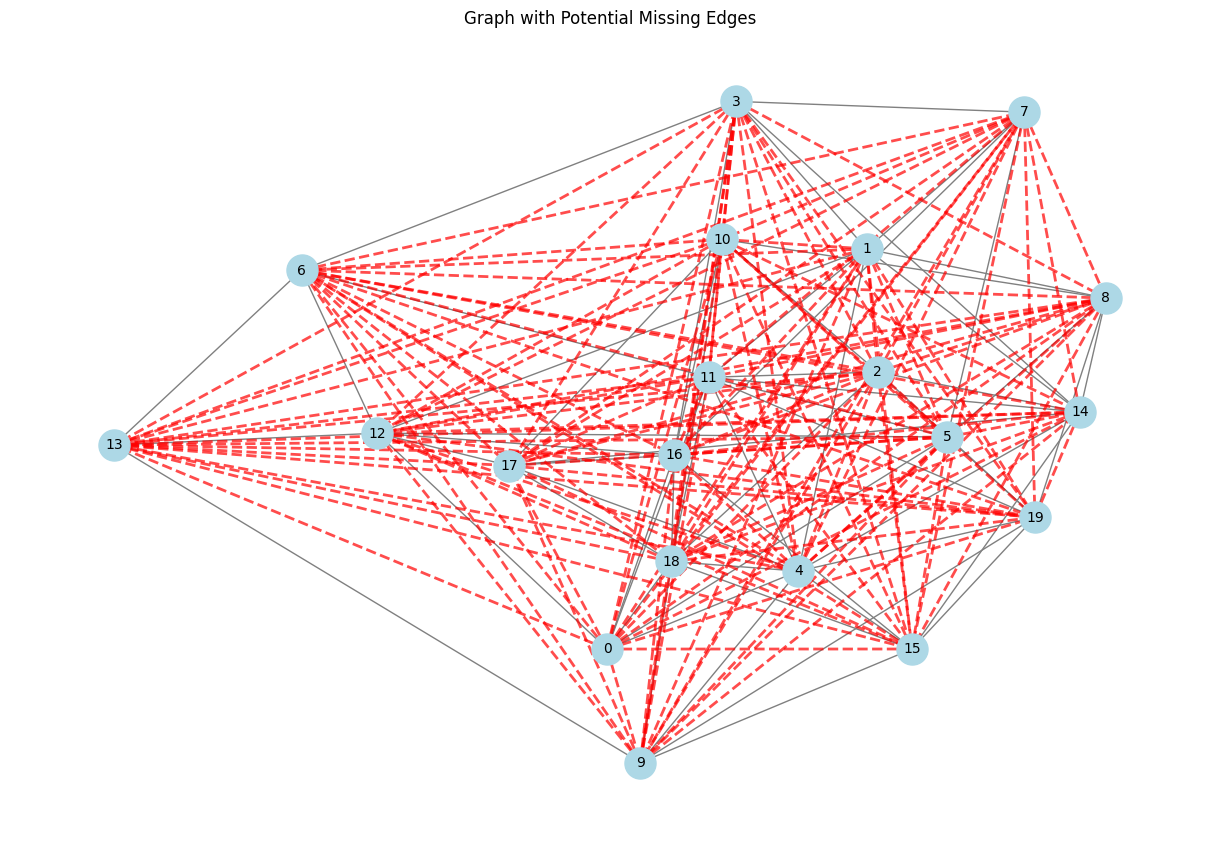

In [50]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

def missing_edge_prediction(G):
    """
    Predict missing edges based on node similarity, print predictions, and visualize potential missing edges.

    Parameters:
    G (networkx.Graph): The input graph to predict missing edges and visualize.
    """
    # Extract node features (degree in this example)
    nodes = list(G.nodes())
    features = np.array([G.degree(node) for node in nodes]).reshape(-1, 1)
    similarity_matrix = cosine_similarity(features)

    # Predict missing edges
    missing_edges = []
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            if not G.has_edge(nodes[i], nodes[j]):
                missing_edges.append((nodes[i], nodes[j], similarity_matrix[i, j]))

    # Print potential missing edges
    print("Potential Missing Edges (sorted by predicted similarity):")
    for edge in sorted(missing_edges, key=lambda x: x[2], reverse=True):
        print(f"Edge ({edge[0]}, {edge[1]}) - Similarity: {edge[2]:.2f}")

    # Visualization
    pos = nx.spring_layout(G)  # Position nodes using the spring layout
    plt.figure(figsize=(12, 8))

    # Draw the existing graph
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)

    # Draw potential missing edges
    missing_edges_edges = [(u, v) for u, v, _ in missing_edges]
    nx.draw_networkx_edges(G, pos, edgelist=missing_edges_edges, edge_color='red', style='dashed', width=2, alpha=0.7)

    plt.title("Graph with Potential Missing Edges")
    plt.show()

# Call the function with the graph
missing_edge_prediction(G_evolved)


The potential missing edges show a high density of predicted connections between nodes, all with a uniform weight of 1.0. This extensive list highlights numerous connections not present in the original graph, suggesting possible areas for improving network connectivity or further analysis.

# 4. Sub-Graph Level Tasks
## 4.1. Community Detection

Community 0: frozenset({16, 1, 17, 3, 7, 14})
Community 1: frozenset({2, 19, 5, 8, 10, 11})
Community 2: frozenset({0, 18, 4, 9, 15})
Community 3: frozenset({12, 13, 6})


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


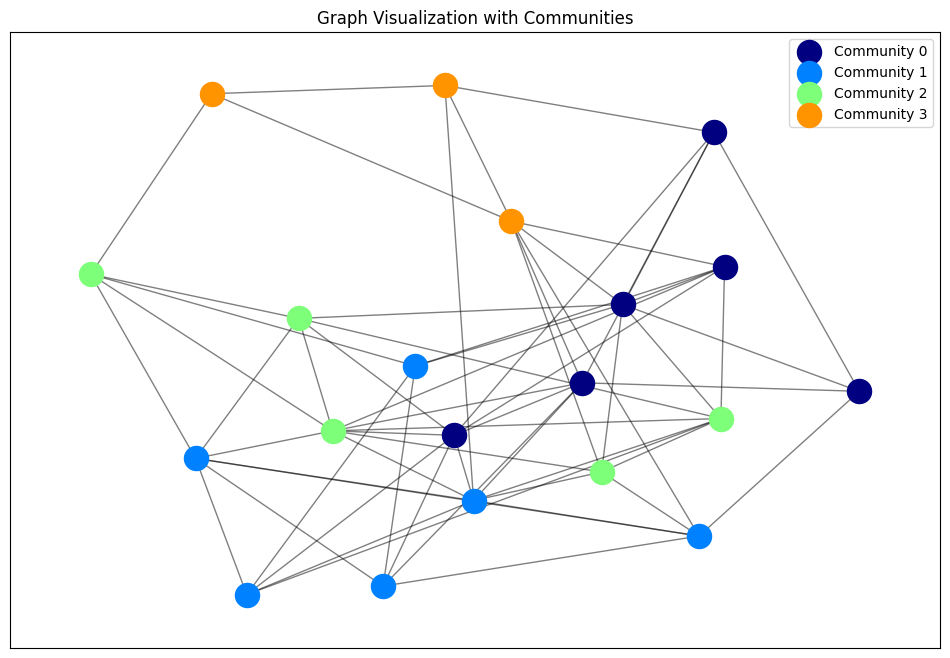

In [45]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import community

def detect_communities(graph):
    # Detect communities using greedy modularity
    communities = community.greedy_modularity_communities(graph)

    # Print all communities
    for idx, comm in enumerate(communities):
        print(f"Community {idx}: {comm}")

    # Visualize the graph with communities
    pos = nx.spring_layout(graph)  # Position nodes using spring layout
    plt.figure(figsize=(12, 8))

    # Draw nodes and edges
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    for idx, comm in enumerate(communities):
        nx.draw_networkx_nodes(graph, pos, nodelist=comm, node_color=plt.cm.jet(idx / len(communities)), label=f'Community {idx}')

    plt.title("Graph Visualization with Communities")
    plt.legend()
    plt.show()

# Example usage
detect_communities(G_evolved)


The communities reveal distinct groupings: Community 0 has 6 members with various connections; Community 1 groups 6 nodes; Community 2 includes 5 nodes; and Community 3 consists of 3 nodes, indicating diverse network structures.

## 4.2. Subgraph Property Prediction

Subgraph 0 nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Subgraph 0 edges: [(0, 4), (0, 5), (0, 11), (0, 12), (0, 16), (0, 18), (1, 3), (1, 4), (1, 7), (1, 8), (1, 11), (1, 12), (1, 14), (2, 10), (2, 11), (2, 14), (2, 18), (2, 19), (3, 6), (3, 7), (3, 14), (3, 16), (4, 9), (4, 11), (4, 14), (4, 15), (4, 17), (4, 18), (4, 19), (5, 7), (5, 8), (5, 11), (5, 12), (5, 19), (6, 11), (6, 12), (6, 13), (7, 16), (8, 10), (8, 14), (8, 19), (9, 10), (9, 13), (9, 15), (9, 19), (10, 16), (10, 17), (11, 14), (11, 18), (11, 19), (12, 13), (12, 16), (12, 17), (14, 15), (14, 17), (15, 16), (15, 18), (15, 19), (16, 17), (16, 18), (17, 18)]


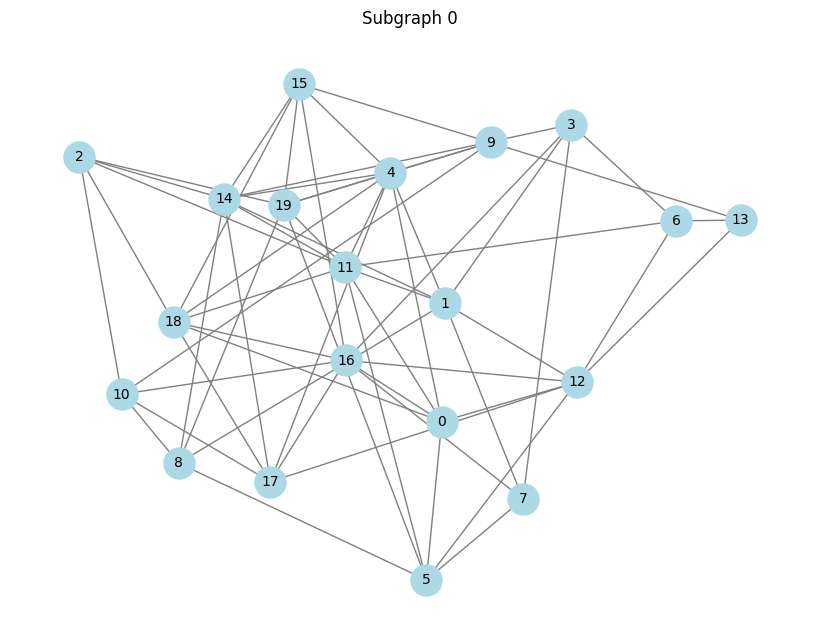

In [46]:
import networkx as nx
import matplotlib.pyplot as plt

def subgraph_property_prediction(G):
    """
    Predict properties based on the structure of subgraphs within the graph and visualize them.

    Parameters:
    G (networkx.Graph): The input graph for which subgraph properties will be predicted and visualized.
    """
    # Get connected components as subgraphs
    subgraphs = list(nx.connected_components(G))

    for i, nodes in enumerate(subgraphs):
        # Create a subgraph for each connected component
        subgraph = G.subgraph(nodes)

        # Print the nodes and edges of the subgraph
        print(f"Subgraph {i} nodes: {list(subgraph.nodes())}")
        print(f"Subgraph {i} edges: {list(subgraph.edges())}")

        # Visualize the subgraph
        plt.figure(figsize=(8, 6))
        pos = nx.spring_layout(subgraph)  # Position nodes using the spring layout
        nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
        plt.title(f"Subgraph {i}")
        plt.show()

# Example usage
subgraph_property_prediction(G_evolved)


Subgraph 0 encompasses all 20 nodes and features an extensive set of edges, illustrating a densely interconnected network. The edges connect nodes in a complex pattern, showcasing a highly integrated subgraph with numerous interconnections among its members.

\
# Modelling Graphical/Network Data

## What is a Graph (Formally)?

A graph is a fundamental structure in network analysis and consists of:

- **Vertices** ($V$): A set of objects, denoted as $V$. Each object in this set is called a vertex or node.
- **Edges** ($E$): A set of pairs of vertices, denoted as $E$. Each pair $\{u, v\}$ in this set is called an edge, connecting vertices $u$ and $v$.
- **Edge Weights** ($\hat{E}$): A function that assigns a non-negative real number to each edge, representing the weight of the edge. This is a weighted graph if $\hat{E}$ is defined.

Formally, a graph $G$ can be represented as $G = (V, E, \hat{E})$, where:

- $V$ is the vertex set.
- $E \subseteq V^2$ is the edge set, which includes all pairs $\{i, j\}$ where $i, j \in V$.
- $\hat{E}: E \to \mathbb{R}^+$ is the weight function, assigning a weight to each edge in $E$.

## Notations and Definitions

### Vertex Set

Typically, vertices are labeled as $V = \{1, 2, \ldots, n\}$.

### Edges

For an edge $\{i, j\} \in E$, we denote this edge as $ij$ and the weight as $\hat{E}_{ij} = \hat{E}(\{i, j\})$.

### Neighborhood

The neighborhood $N(i)$ of a vertex $i$ is the set of all vertices adjacent to $i$. Formally:
$$
N(i) := \{ j \in V \mid \{i, j\} \in E \}
$$
Elements of $N(i)$ are called neighbors of $i$.

### Degree

The degree $d(i)$ of a vertex $i$ is the number of edges connected to $i$:
$$
d(i) := |N(i)|
$$

## Example

Consider a graph with vertices $\{1, 2, 3, 4, 5\}$ and the following edges:

- $\{2, 3\}$ with weight $w(2, 3) = 1$

Vertex $4$ has neighbors $\{1\}$. Vertex $1$ has neighbors $\{3, 4\}$ with degree $d(1) = 2$.

This structure allows us to model and analyze complex networks, such as social networks, communication networks, and biological networks.


Vertices: [1, 2, 3, 4, 5]
Edges with weights: [(1, 2, 0.5), (1, 3, 1.0), (2, 4, 1.5), (3, 4, 2.0), (4, 5, 0.75)]
Node 1: Neighbors = [2, 3], Degree = 2
Node 2: Neighbors = [1, 4], Degree = 2
Node 3: Neighbors = [1, 4], Degree = 2
Node 4: Neighbors = [2, 3, 5], Degree = 3
Node 5: Neighbors = [4], Degree = 1


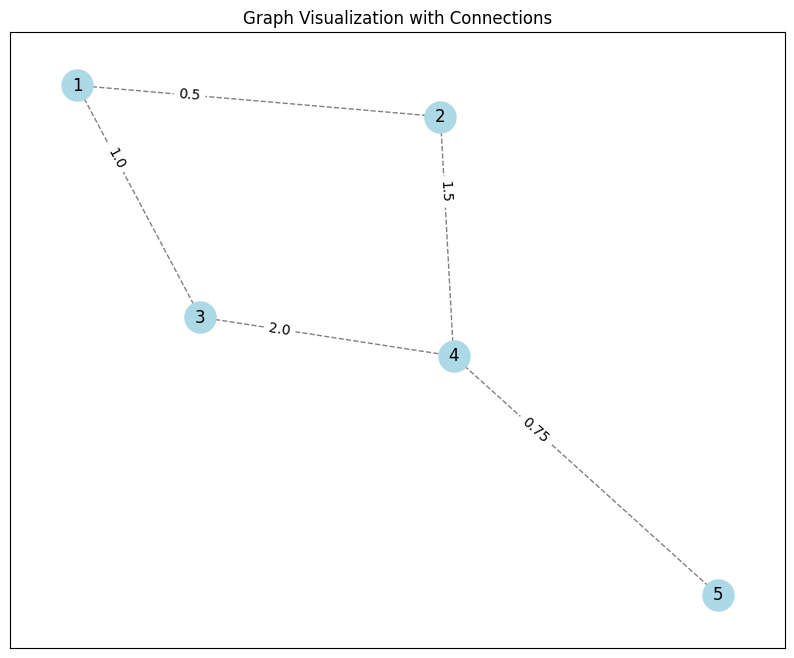

In [54]:
import networkx as nx
import matplotlib.pyplot as plt

def create_graph():
    # Create a new graph
    G = nx.Graph()

    # Add nodes
    nodes = [1, 2, 3, 4, 5]
    G.add_nodes_from(nodes)

    # Add edges with weights
    edges = [(1, 2, 0.5), (1, 3, 1.0), (2, 4, 1.5), (3, 4, 2.0), (4, 5, 0.75)]
    G.add_weighted_edges_from(edges)

    return G

def print_graph_info(G):
    # Print vertex set
    print("Vertices:", G.nodes())

    # Print edge set with weights
    print("Edges with weights:", list(G.edges(data='weight')))

    # Print neighborhood and degree of each node
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        degree = G.degree(node)
        print(f"Node {node}: Neighbors = {neighbors}, Degree = {degree}")

def visualize_graph(G):
    # Draw the graph
    pos = nx.spring_layout(G)  # Positioning of nodes
    plt.figure(figsize=(10, 8))

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    # Draw edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray', style='dashed')

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

    # Draw edge labels (weights)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3)

    plt.title("Graph Visualization with Connections")
    plt.show()

# Create and analyze the graph
G = create_graph()
print_graph_info(G)
visualize_graph(G)


# Graph Classes

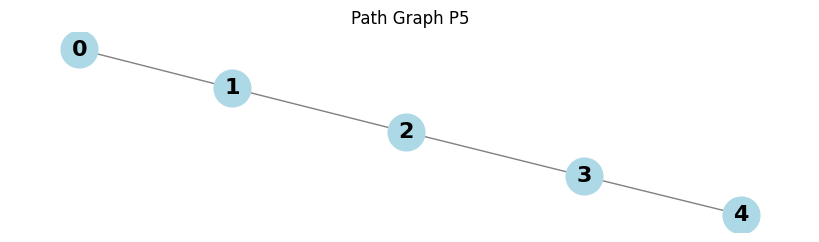

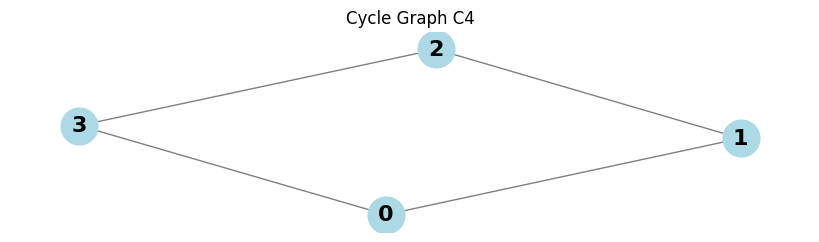

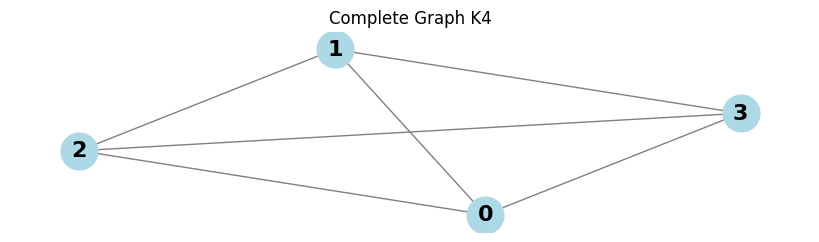

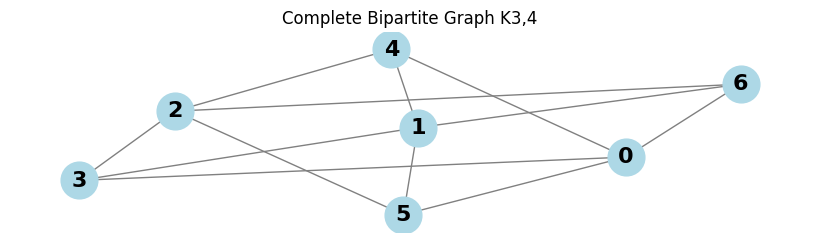

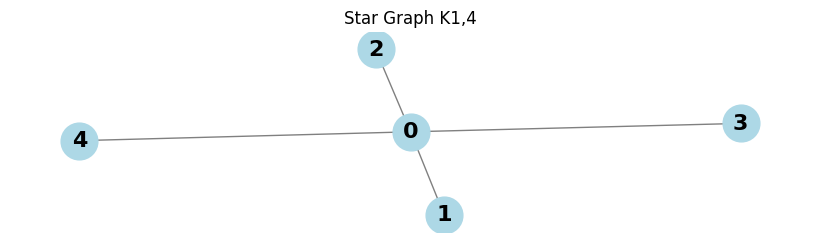

In [56]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to create and display graphs
def create_and_display_graph(G, title):
    pos = nx.spring_layout(G)  # Position nodes using the spring layout
    plt.figure(figsize=(8, 2))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', edge_color='gray', font_size=16, font_weight='bold')
    plt.title(title)
    plt.show()

# Path Graph Pn
def create_path_graph(n):
    G = nx.path_graph(n)
    create_and_display_graph(G, f'Path Graph P{n}')

# Cycle Graph Cn
def create_cycle_graph(n):
    G = nx.cycle_graph(n)
    create_and_display_graph(G, f'Cycle Graph C{n}')

# Complete Graph Kn
def create_complete_graph(n):
    G = nx.complete_graph(n)
    create_and_display_graph(G, f'Complete Graph K{n}')

# Complete Bipartite Graph Km,n
def create_complete_bipartite_graph(m, n):
    G = nx.complete_bipartite_graph(m, n)
    create_and_display_graph(G, f'Complete Bipartite Graph K{m},{n}')

# Star Graph K1,n
def create_star_graph(n):
    G = nx.star_graph(n)
    create_and_display_graph(G, f'Star Graph K1,{n}')

# Create and display graphs
create_path_graph(5)            # Path graph P5
create_cycle_graph(4)           # Cycle graph C4
create_complete_graph(4)        # Complete graph K4
create_complete_bipartite_graph(3, 4)  # Complete bipartite graph K3,4
create_star_graph(4)            # Star graph K1,4


# Digraph

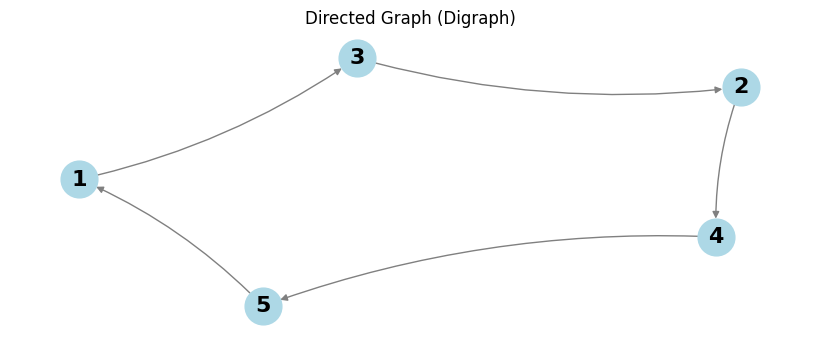

Node 1:
  Out-neighbourhood (N+(1)): [3]
  In-neighbourhood (N-(1)): [5]
  Out-degree (d+(1)): 1
  In-degree (d-(1)): 1

Node 2:
  Out-neighbourhood (N+(2)): [4]
  In-neighbourhood (N-(2)): [3]
  Out-degree (d+(2)): 1
  In-degree (d-(2)): 1

Node 3:
  Out-neighbourhood (N+(3)): [2]
  In-neighbourhood (N-(3)): [1]
  Out-degree (d+(3)): 1
  In-degree (d-(3)): 1

Node 4:
  Out-neighbourhood (N+(4)): [5]
  In-neighbourhood (N-(4)): [2]
  Out-degree (d+(4)): 1
  In-degree (d-(4)): 1

Node 5:
  Out-neighbourhood (N+(5)): [1]
  In-neighbourhood (N-(5)): [4]
  Out-degree (d+(5)): 1
  In-degree (d-(5)): 1



In [58]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to create and display a digraph
def create_and_display_digraph(G, title):
    pos = nx.spring_layout(G, seed=42)  # Position nodes using the spring layout
    plt.figure(figsize=(8, 3))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', edge_color='gray', font_size=16, font_weight='bold', arrows=True, connectionstyle='arc3,rad=0.1')
    plt.title(title)
    plt.show()

# Define a directed graph (digraph)
def define_digraph():
    G = nx.DiGraph()

    # Add nodes
    nodes = [1, 2, 3, 4, 5]
    G.add_nodes_from(nodes)

    # Add directed edges (arcs) with weights
    edges = [(1, 3), (3, 2), (2, 4), (4, 5), (5, 1)]
    G.add_edges_from(edges)

    # Display the digraph
    create_and_display_digraph(G, 'Directed Graph (Digraph)')

    # Display properties
    for node in G.nodes():
        out_neighbors = list(G.successors(node))
        in_neighbors = list(G.predecessors(node))
        print(f"Node {node}:")
        print(f"  Out-neighbourhood (N+({node})):", out_neighbors)
        print(f"  In-neighbourhood (N-({node})):", in_neighbors)
        print(f"  Out-degree (d+({node})):", G.out_degree(node))
        print(f"  In-degree (d-({node})):", G.in_degree(node))
        print()

# Create and display the digraph
define_digraph()


# Multigraph

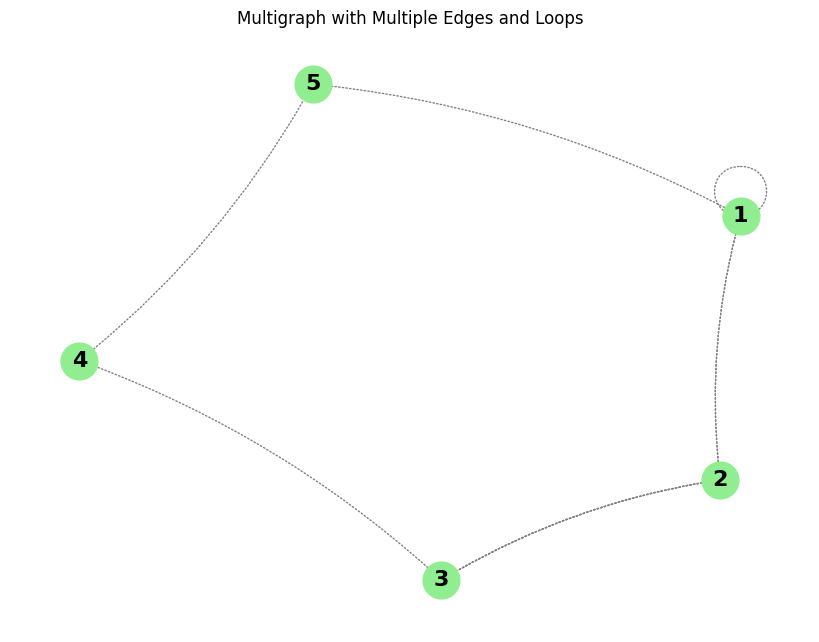

Node 1:
  Neighbours: [2, 5, 1]
  Degree (number of edges, including multiplicity): 5

Node 2:
  Neighbours: [1, 3]
  Degree (number of edges, including multiplicity): 5

Node 3:
  Neighbours: [2, 4]
  Degree (number of edges, including multiplicity): 4

Node 4:
  Neighbours: [3, 5]
  Degree (number of edges, including multiplicity): 2

Node 5:
  Neighbours: [4, 1]
  Degree (number of edges, including multiplicity): 2



In [59]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to create and display a multigraph
def create_and_display_multigraph(G, title):
    pos = nx.spring_layout(G, seed=42)  # Position nodes using the spring layout
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightgreen', edge_color='gray', font_size=16, font_weight='bold', style='dotted', connectionstyle='arc3,rad=0.1')
    plt.title(title)
    plt.show()

# Define a multigraph
def define_multigraph():
    G = nx.MultiGraph()

    # Add nodes
    nodes = [1, 2, 3, 4, 5]
    G.add_nodes_from(nodes)

    # Add multiple edges (including loops)
    edges = [
        (1, 2), (1, 2),  # Multiple edges between node 1 and 2
        (2, 3), (2, 3), (2, 3),  # Multiple edges between node 2 and 3
        (3, 4),
        (4, 5),
        (5, 1),
        (1, 1)  # Loop (self-edge)
    ]
    G.add_edges_from(edges)

    # Display the multigraph
    create_and_display_multigraph(G, 'Multigraph with Multiple Edges and Loops')

    # Display properties
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        print(f"Node {node}:")
        print(f"  Neighbours:", neighbors)
        print(f"  Degree (number of edges, including multiplicity):", G.degree(node))
        print()

# Create and display the multigraph
define_multigraph()


# Hypergraph

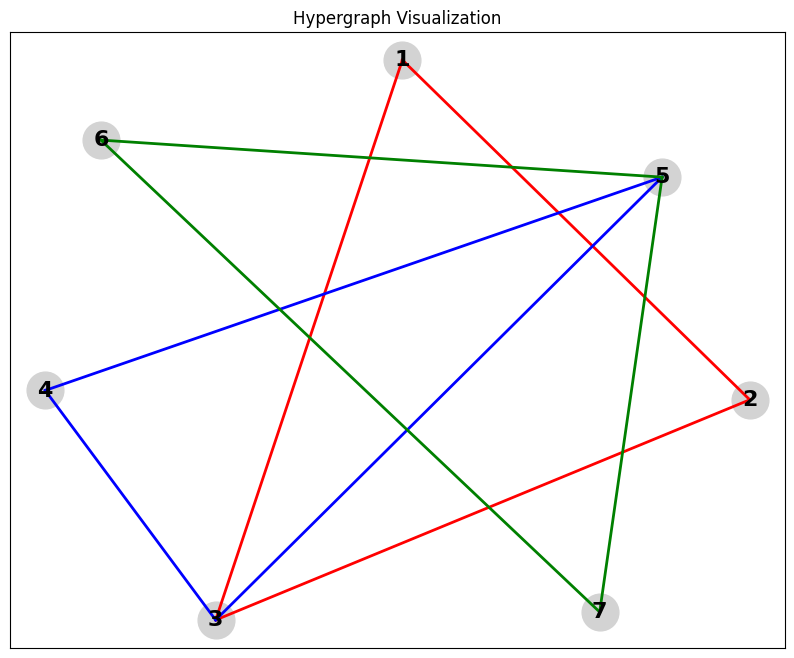

In [60]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as patches

# Function to draw hyperedges
def draw_hypergraph_hyperedges(ax, hyperedges, pos, colors):
    for idx, hyperedge in enumerate(hyperedges):
        nodes = list(hyperedge)
        if len(nodes) > 1:
            for i in range(len(nodes)):
                for j in range(i + 1, len(nodes)):
                    ax.plot([pos[nodes[i]][0], pos[nodes[j]][0]],
                            [pos[nodes[i]][1], pos[nodes[j]][1]],
                            color=colors[idx], linestyle='-', linewidth=2)

# Define and visualize a hypergraph
def define_and_display_hypergraph():
    # Define vertices
    vertices = list(range(1, 8))

    # Define hyperedges (each hyperedge connects multiple vertices)
    hyperedges = [
        {1, 2, 3},  # Hyperedge e1
        {3, 4, 5},  # Hyperedge e2
        {5, 6, 7},  # Hyperedge e3
    ]

    # Create a graph to visualize the hypergraph
    G = nx.Graph()
    G.add_nodes_from(vertices)

    # Define positions for nodes
    pos = nx.spring_layout(G, seed=42)

    # Colors for hyperedges
    colors = ['red', 'blue', 'green']

    # Create a figure and axis
    plt.figure(figsize=(10, 8))
    ax = plt.gca()

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightgrey', ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold', ax=ax)

    # Draw the hyperedges
    draw_hypergraph_hyperedges(ax, hyperedges, pos, colors)

    # Draw the node connections
    nx.draw_networkx_edges(G, pos, edgelist=[], style='dotted', ax=ax)

    plt.title('Hypergraph Visualization')
    plt.show()

# Define and display the hypergraph
define_and_display_hypergraph()


# Storing Graph

To model and store graphs in Python, you can use different representations such as adjacency matrices, adjacency lists, and weight matrices. Here’s how you can define and work with these graph representations:

## 1. Adjacency Matrix
The adjacency matrix is a square matrix used to represent a finite graph. For an undirected graph, the matrix is symmetric, and for a directed graph, it is not necessarily symmetric. If the graph is weighted, the matrix contains weights; otherwise, it contains 1s for edges and 0s for non-edges.

In [61]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def adjacency_matrix(G):
    # Get the adjacency matrix of the graph
    A = nx.adjacency_matrix(G).todense()
    print("Adjacency Matrix:")
    print(A)
    return A

def weighted_matrix(G):
    # Get the weighted adjacency matrix of the graph
    W = nx.adjacency_matrix(G, weight='weight').todense()
    print("Weighted Matrix:")
    print(W)
    return W

# Create a graph
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])
nx.set_edge_attributes(G, 1, 'weight')  # Set default weight to 1

# Display matrices
adjacency_matrix(G)
weighted_matrix(G)


Adjacency Matrix:
[[0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]]
Weighted Matrix:
[[0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]]


array([[0, 1, 0, 1],
       [1, 0, 1, 0],
       [0, 1, 0, 1],
       [1, 0, 1, 0]])

The adjacency matrix and weighted matrix both display a cyclic graph structure. Each matrix shows the connections between nodes, with 1 indicating an edge between nodes, illustrating a bidirectional connection pattern.

## 2. Adjacency List
An adjacency list is a collection of lists or dictionaries where each list or dictionary contains the neighbors of a vertex. This representation is efficient for sparse graphs.

In [62]:
def adjacency_list(G):
    # Get the adjacency list of the graph
    adj_list = dict(G.adjacency())
    print("Adjacency List:")
    for node, neighbors in adj_list.items():
        print(f"Node {node}: {list(neighbors.keys())}")
    return adj_list

# Create a graph
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

# Display adjacency list
adjacency_list(G)


Adjacency List:
Node 1: [2, 4]
Node 2: [1, 3]
Node 3: [2, 4]
Node 4: [3, 1]


{1: {2: {}, 4: {}}, 2: {1: {}, 3: {}}, 3: {2: {}, 4: {}}, 4: {3: {}, 1: {}}}

The adjacency list outlines the directed graph's structure: each node's neighbors are listed. Node 1 connects to Nodes 2 and 4, Node 2 to Nodes 1 and 3, etc., representing a cyclic pattern.

## 3. Directed Graph Representations
For directed graphs, the representations are similar, but they take into account the direction of edges.

In [63]:
def directed_adjacency_matrix(G):
    # Get the directed adjacency matrix of the graph
    A = nx.adjacency_matrix(G, weight=None).todense()
    print("Directed Adjacency Matrix:")
    print(A)
    return A

def directed_weighted_matrix(G):
    # Get the directed weighted adjacency matrix of the graph
    W = nx.adjacency_matrix(G, weight='weight').todense()
    print("Directed Weighted Matrix:")
    print(W)
    return W

# Create a directed graph
DG = nx.DiGraph()
DG.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])
nx.set_edge_attributes(DG, 1, 'weight')  # Set default weight to 1

# Display matrices
directed_adjacency_matrix(DG)
directed_weighted_matrix(DG)


Directed Adjacency Matrix:
[[0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
Directed Weighted Matrix:
[[0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]


array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0]])

The matrices represent a directed graph with cyclic connections. Both the Directed Adjacency Matrix and Directed Weighted Matrix show edges in a cycle, with identical weights indicating no additional edge-specific weights.

# How to transform a digraph into an undirected graph
## 1. Ignoring the Directions
To ignore the directions and simply create an undirected graph from a directed graph, you can convert the directed graph to an undirected graph directly.

In [65]:
import networkx as nx

def ignore_directions(DG):
    # Convert directed graph to undirected graph
    G = DG.to_undirected()
    return G
G

## 2. Cocitation Coupling
Cocitation coupling involves creating an undirected graph where the weight of the edge between two nodes is the number of common predecessors.

In [66]:
import numpy as np

def cocitation_coupling(DG):
    nodes = list(DG.nodes())
    adjacency_matrix = nx.to_numpy_array(DG, nodelist=nodes, weight=None)

    # Compute cocitation matrix
    cocitation_matrix = np.dot(adjacency_matrix, adjacency_matrix.T)

    # Create a new undirected graph
    G = nx.Graph()
    for i, node_i in enumerate(nodes):
        for j, node_j in enumerate(nodes):
            if i != j and cocitation_matrix[i, j] > 0:
                G.add_edge(node_i, node_j, weight=cocitation_matrix[i, j])

    return G


## 3. Bibliographic Coupling
Bibliographic coupling involves creating an undirected graph where the weight of the edge between two nodes is the number of common successors.

In [67]:
def bibliographic_coupling(DG):
    nodes = list(DG.nodes())
    adjacency_matrix = nx.to_numpy_array(DG, nodelist=nodes, weight=None)

    # Compute bibliographic coupling matrix
    bibliographic_coupling_matrix = np.dot(adjacency_matrix.T, adjacency_matrix)

    # Create a new undirected graph
    G = nx.Graph()
    for i, node_i in enumerate(nodes):
        for j, node_j in enumerate(nodes):
            if i != j and bibliographic_coupling_matrix[i, j] > 0:
                G.add_edge(node_i, node_j, weight=bibliographic_coupling_matrix[i, j])

    return G


## Example Usage


Undirected Graph ignoring directions:
[(1, 3, {}), (1, 2, {}), (3, 2, {}), (2, 4, {})]
Undirected Graph using cocitation coupling:
[(3, 4, {'weight': 1.0})]
Undirected Graph using bibliographic coupling:
[]


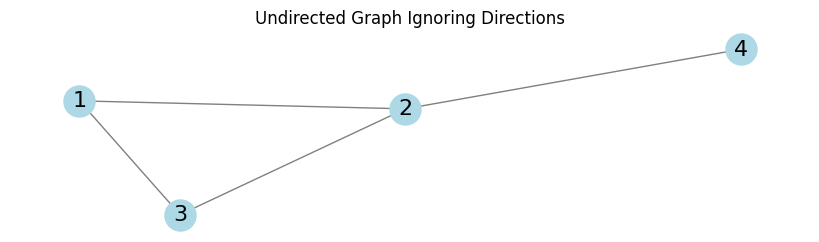

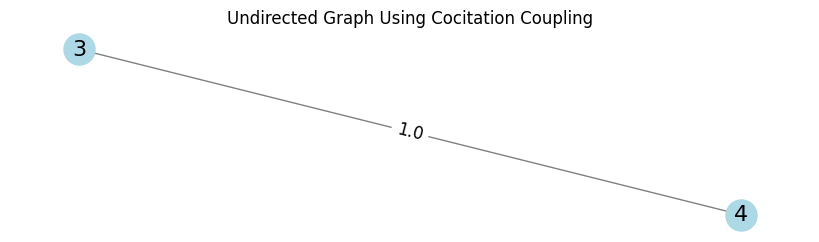

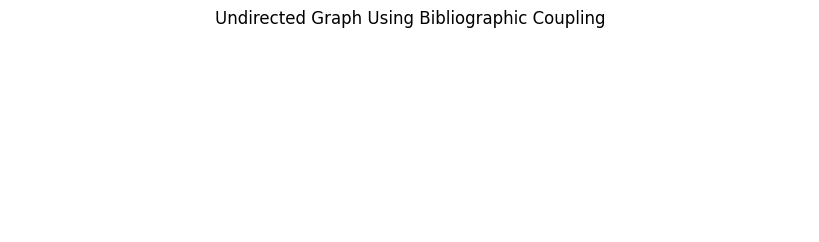

In [70]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Define the functions

def ignore_directions(DG):
    # Convert directed graph to undirected graph
    G = DG.to_undirected()
    return G

def cocitation_coupling(DG):
    nodes = list(DG.nodes())
    adjacency_matrix = nx.to_numpy_array(DG, nodelist=nodes, weight=None)

    # Compute cocitation matrix
    cocitation_matrix = np.dot(adjacency_matrix, adjacency_matrix.T)

    # Create a new undirected graph
    G = nx.Graph()
    for i, node_i in enumerate(nodes):
        for j, node_j in enumerate(nodes):
            if i != j and cocitation_matrix[i, j] > 0:
                G.add_edge(node_i, node_j, weight=cocitation_matrix[i, j])

    return G

def bibliographic_coupling(DG):
    nodes = list(DG.nodes())
    adjacency_matrix = nx.to_numpy_array(DG, nodelist=nodes, weight=None)

    # Compute bibliographic coupling matrix
    bibliographic_coupling_matrix = np.dot(adjacency_matrix.T, adjacency_matrix)

    # Create a new undirected graph
    G = nx.Graph()
    for i, node_i in enumerate(nodes):
        for j, node_j in enumerate(nodes):
            if i != j and bibliographic_coupling_matrix[i, j] > 0:
                G.add_edge(node_i, node_j, weight=bibliographic_coupling_matrix[i, j])

    return G

# Create a directed graph
DG = nx.DiGraph([(1, 3), (2, 1), (3, 2), (4, 2)])

# Transform using different methods
G_ignore = ignore_directions(DG)
G_cocitation = cocitation_coupling(DG)
G_bibliographic = bibliographic_coupling(DG)

# Print results
print("Undirected Graph ignoring directions:")
print(G_ignore.edges(data=True))

print("Undirected Graph using cocitation coupling:")
print(G_cocitation.edges(data=True))

print("Undirected Graph using bibliographic coupling:")
print(G_bibliographic.edges(data=True))

# Visualize the graphs

def draw_graph(G, title):
    plt.figure(figsize=(8, 2))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=16)

    # Draw edge labels for weighted edges
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

    plt.title(title)
    plt.show()

# Visualize each graph
draw_graph(G_ignore, "Undirected Graph Ignoring Directions")
draw_graph(G_cocitation, "Undirected Graph Using Cocitation Coupling")
draw_graph(G_bibliographic, "Undirected Graph Using Bibliographic Coupling")


## Hypergraphs, Clique, and Star Expansions
How to transform a hypergraph into a graph?

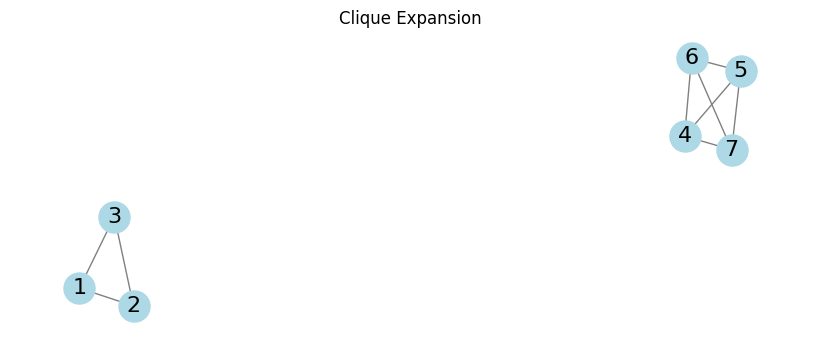

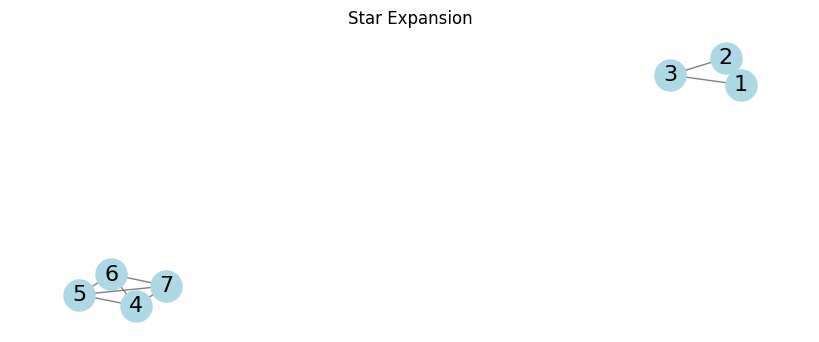

In [75]:
import networkx as nx
import matplotlib.pyplot as plt

def clique_expansion(H):
    # Create an empty graph for clique expansion
    Gx = nx.Graph()

    # Add nodes to the new graph
    Gx.add_nodes_from(H.nodes())

    # Add edges for each hyperedge
    for hyperedge in H.edges():
        nodes = list(hyperedge)
        for i in range(len(nodes)):
            for j in range(i + 1, len(nodes)):
                Gx.add_edge(nodes[i], nodes[j])

    return Gx

def star_expansion(H):
    # Create an empty graph for star expansion
    G_star = nx.Graph()

    # Add nodes to the new graph
    G_star.add_nodes_from(H.nodes())

    # Add edges for each hyperedge
    for hyperedge in H.edges():
        nodes = list(hyperedge)
        for i in range(len(nodes)):
            for j in range(i + 1, len(nodes)):
                G_star.add_edge(nodes[i], nodes[j])

    return G_star

def draw_graph(G, title):
    plt.figure(figsize=(8, 3))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=16)

    # Draw edge labels for weighted edges (if any)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

    plt.title(title)
    plt.show()

# Define a hypergraph H
H = nx.Graph()
H.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
# Manually add hyperedges as sets of nodes
hyperedges = [{1, 2, 3}, {4, 5, 6, 7}]
# Convert hyperedges to a format NetworkX can use
for hyperedge in hyperedges:
    for node in hyperedge:
        H.add_node(node)
    # Add edges between all pairs of nodes in the hyperedge
    for i in range(len(hyperedge)):
        for j in range(i + 1, len(hyperedge)):
            H.add_edge(list(hyperedge)[i], list(hyperedge)[j])

# Perform clique and star expansions
G_clique = clique_expansion(H)
G_star = star_expansion(H)

# Visualize the results
draw_graph(G_clique, "Clique Expansion")
draw_graph(G_star, "Star Expansion")


## What if data without structure is given?

Edges with weights:
x1 -- x2, weight: 0.8
x1 -- x3, weight: 0.3
x2 -- x3, weight: 0.6
x2 -- x4, weight: 0.5
x3 -- x4, weight: 0.7


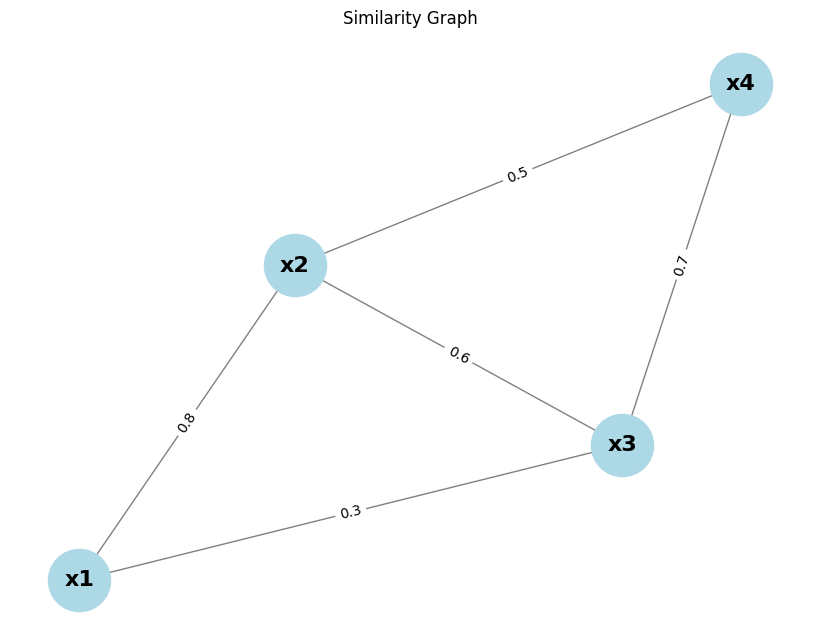

In [76]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Define the data points and similarity matrix
data_points = ['x1', 'x2', 'x3', 'x4']
similarity_matrix = np.array([
    [0, 0.8, 0.3, 0.0],
    [0.8, 0, 0.6, 0.5],
    [0.3, 0.6, 0, 0.7],
    [0.0, 0.5, 0.7, 0]
])

# Create a graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(data_points)

# Add edges based on similarity matrix
for i in range(len(data_points)):
    for j in range(i + 1, len(data_points)):
        if similarity_matrix[i, j] > 0:
            G.add_edge(data_points[i], data_points[j], weight=similarity_matrix[i, j])

# Print edges with weights
print("Edges with weights:")
for u, v, data in G.edges(data=True):
    print(f"{u} -- {v}, weight: {data['weight']}")

# Draw the graph
pos = nx.spring_layout(G)
weights = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=16, font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
plt.title('Similarity Graph')
plt.show()


Edges between data points with weights indicate similarity: x1 is closely related to x2 (0.8) and x3 (0.3), x2 connects well with x3 (0.6) and x4 (0.5), and x3 with x4 (0.7).

# α-neighbourhood graph in Python using NetworkX:

Define the similarity matrix.
Fix the threshold α.
Create a graph where vertices are connected if their similarity is less than α.

Edges of the α-neighbourhood graph:
[(0, 2), (0, 3)]


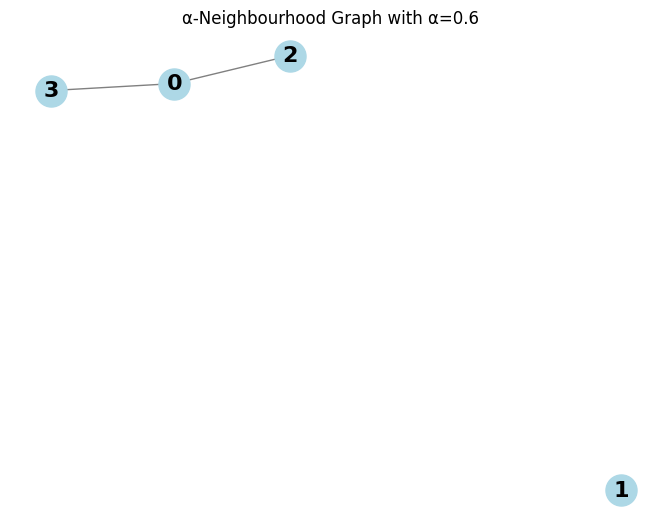

In [78]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def create_alpha_neighbourhood_graph(similarity_matrix, alpha):
    """
    Create an α-neighbourhood graph based on the similarity matrix.

    Parameters:
    - similarity_matrix: A 2D numpy array where similarity_matrix[i, j] represents the similarity between points i and j.
    - alpha: The threshold for creating edges.

    Returns:
    - A NetworkX graph object representing the α-neighbourhood graph.
    """
    n = similarity_matrix.shape[0]
    G = nx.Graph()

    # Add nodes to the graph
    G.add_nodes_from(range(n))

    # Add edges based on the similarity threshold
    for i in range(n):
        for j in range(i + 1, n):
            if similarity_matrix[i, j] < alpha:
                G.add_edge(i, j)

    return G

# Example usage
similarity_matrix = np.array([
    [1.0, 0.8, 0.3, 0.5],
    [0.8, 1.0, 0.6, 0.7],
    [0.3, 0.6, 1.0, 0.9],
    [0.5, 0.7, 0.9, 1.0]
])

alpha = 0.6
alpha_neighbourhood_graph = create_alpha_neighbourhood_graph(similarity_matrix, alpha)

# Print the edges of the α-neighbourhood graph
print("Edges of the α-neighbourhood graph:")
print(alpha_neighbourhood_graph.edges())

# Visualization
pos = nx.spring_layout(alpha_neighbourhood_graph)  # Position nodes using the spring layout
nx.draw(alpha_neighbourhood_graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=16, font_weight='bold')
plt.title(f'α-Neighbourhood Graph with α={alpha}')
plt.show()



Edges of the α-neighbourhood graph: The graph contains edges between vertices (0, 2) and (0, 3), indicating that these vertices have similarities less than the threshold α.








# k-nearest neighbor (k-NN) graph and the mutual k-nearest neighbor graph in Python using NetworkX and NumPy:

k-Nearest Neighbor Graph: Connect each vertex to its k nearest neighbors based on the similarity matrix, then create an undirected graph by ignoring edge directions.

Mutual k-Nearest Neighbor Graph: Similar to the k-NN graph but only includes edges that are mutual (i.e., if vertex 𝑖 considers vertex 𝑗 as a k-nearest neighbor, then 𝑗 should also consider 𝑖 as a k-nearest neighbor).

Edges of the k-nearest neighbor graph:
[(0, 1, {'weight': 0.8}), (2, 3, {'weight': 0.9})]
Edges of the mutual k-nearest neighbor graph:
[(0, 1, {}), (2, 3, {})]


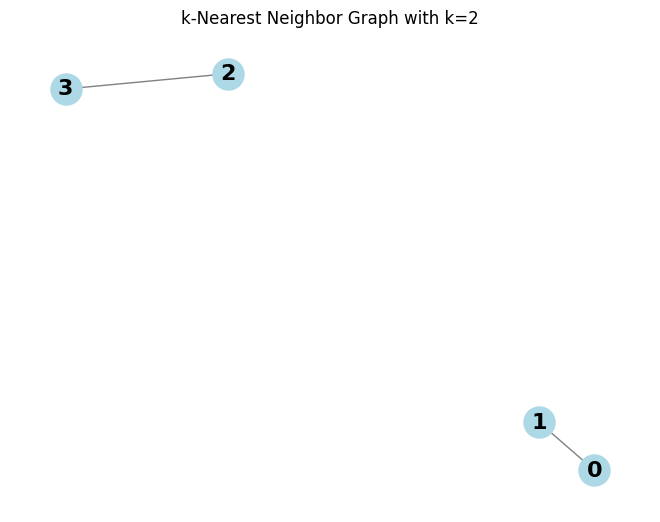

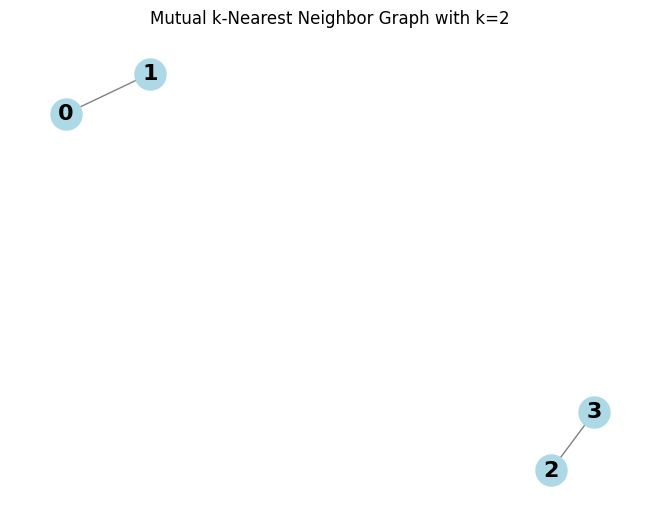

In [79]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def k_nearest_neighbor_graph(similarity_matrix, k):
    """
    Create a k-nearest neighbor graph based on the similarity matrix.

    Parameters:
    - similarity_matrix: A 2D numpy array where similarity_matrix[i, j] represents the similarity between points i and j.
    - k: The number of nearest neighbors to connect.

    Returns:
    - A NetworkX graph object representing the k-nearest neighbor graph.
    """
    n = similarity_matrix.shape[0]
    G = nx.Graph()

    # Add nodes to the graph
    G.add_nodes_from(range(n))

    # Add edges based on the k nearest neighbors
    for i in range(n):
        # Get indices of k largest similarities
        nearest_neighbors = np.argsort(-similarity_matrix[i])[:k]
        for j in nearest_neighbors:
            if i != j:  # Avoid self-loops
                G.add_edge(i, j, weight=similarity_matrix[i, j])

    return G

def mutual_k_nearest_neighbor_graph(similarity_matrix, k):
    """
    Create a mutual k-nearest neighbor graph based on the similarity matrix.

    Parameters:
    - similarity_matrix: A 2D numpy array where similarity_matrix[i, j] represents the similarity between points i and j.
    - k: The number of nearest neighbors to connect.

    Returns:
    - A NetworkX graph object representing the mutual k-nearest neighbor graph.
    """
    G = k_nearest_neighbor_graph(similarity_matrix, k)
    mutual_edges = []

    # Check for mutual nearest neighbors
    for (i, j) in G.edges():
        if j in np.argsort(-similarity_matrix[i])[:k] and i in np.argsort(-similarity_matrix[j])[:k]:
            mutual_edges.append((i, j))

    # Create the mutual k-nearest neighbor graph
    G_mutual = nx.Graph()
    G_mutual.add_nodes_from(G.nodes())
    G_mutual.add_edges_from(mutual_edges)

    return G_mutual

# Example usage
similarity_matrix = np.array([
    [1.0, 0.8, 0.3, 0.5],
    [0.8, 1.0, 0.6, 0.7],
    [0.3, 0.6, 1.0, 0.9],
    [0.5, 0.7, 0.9, 1.0]
])

k = 2
k_nn_graph = k_nearest_neighbor_graph(similarity_matrix, k)
mutual_k_nn_graph = mutual_k_nearest_neighbor_graph(similarity_matrix, k)

# Print the edges of the k-NN and mutual k-NN graphs
print("Edges of the k-nearest neighbor graph:")
print(k_nn_graph.edges(data=True))

print("Edges of the mutual k-nearest neighbor graph:")
print(mutual_k_nn_graph.edges(data=True))

# Visualization
def plot_graph(G, title):
    pos = nx.spring_layout(G)  # Position nodes using the spring layout
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=16, font_weight='bold')
    plt.title(title)
    plt.show()

plot_graph(k_nn_graph, f'k-Nearest Neighbor Graph with k={k}')
plot_graph(mutual_k_nn_graph, f'Mutual k-Nearest Neighbor Graph with k={k}')


**Edges of the k-nearest neighbor graph:**

- (0, 1) with weight 0.8
- (2, 3) with weight 0.9

**Edges of the mutual k-nearest neighbor graph:**

- (0, 1)
- (2, 3)
